# Dogs Classification

This notebook is a UDACITY project which consists on using a pretained ResNet18 network to identify dog types based on pictures. The network will be fine-tuned using AWS SageMaker. 

In [48]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

In [1]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
Dataset is a set of pictures of different dog types (Golden Retriever, Akita, etc).

In [3]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-01-06 15:49:28--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.120
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  8.75MB/s    in 75s     

2022-01-06 15:50:44 (14.4 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

  inflating: dogImages/test/013.Australian_terrier/Australian_terrier_00923.jpg  
  inflating: dogImages/test/013.Australian_terrier/Australian_terrier_00925.jpg  
  inflating: dogImages/test/013.Australian_terrier/Australian_terrier_00930.jpg  
   creating: dogImages/test/014.Basenji/
  inflating: dogImages/test/014.Basenji/Basenji_00955.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00959.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00961.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00974.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00978.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00985.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_00987.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_01009.jpg  
  inflating: dogImages/test/014.Basenji/Basenji_01029.jpg  
   creating: dogImages/test/015.Basset_hound/
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01034.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound

  inflating: dogImages/test/029.Border_collie/Border_collie_02035.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02039.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02051.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02053.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02056.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02077.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02081.jpg  
   creating: dogImages/test/030.Border_terrier/
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02090.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02096.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02097.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02110.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02136.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02141.jpg  
  in

  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03361.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03374.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03386.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03390.jpg  
  inflating: dogImages/test/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03395.jpg  
   creating: dogImages/test/048.Chihuahua/
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03403.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03405.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03411.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03420.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03427.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03448.jpg  
  inflating: dogImages/test/048.Chihuahua/Chihuahua_03460.jpg  
   creating: dogImages/test/049.Chinese

  inflating: dogImages/test/070.German_pinscher/German_pinscher_04843.jpg  
  inflating: dogImages/test/070.German_pinscher/German_pinscher_04861.jpg  
  inflating: dogImages/test/070.German_pinscher/German_pinscher_04863.jpg  
  inflating: dogImages/test/070.German_pinscher/German_pinscher_04875.jpg  
  inflating: dogImages/test/070.German_pinscher/German_pinscher_04876.jpg  
   creating: dogImages/test/071.German_shepherd_dog/
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04886.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04910.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04912.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04931.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04938.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04955.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shep

  inflating: dogImages/test/088.Irish_water_spaniel/Irish_water_spaniel_06016.jpg  
   creating: dogImages/test/089.Irish_wolfhound/
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06022.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06029.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06030.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06050.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06052.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06063.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06071.jpg  
   creating: dogImages/test/090.Italian_greyhound/
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06114.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06115.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06117.jpg  
  inflating: dogImages/test/090.Italian_grey

  inflating: dogImages/test/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07318.jpg  
  inflating: dogImages/test/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07331.jpg  
   creating: dogImages/test/113.Old_english_sheepdog/
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07355.jpg  
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07359.jpg  
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07376.jpg  
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07390.jpg  
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07391.jpg  
   creating: dogImages/test/114.Otterhound/
  inflating: dogImages/test/114.Otterhound/Otterhound_07394.jpg  
  inflating: dogImages/test/114.Otterhound/Otterhound_07405.jpg  
  inflating: dogImages/test/114.Otterhound/Otterhound_07430.jpg  
  inflating: dogImages/test/114.Otterhound/Ott

  inflating: dogImages/test/133.Yorkshire_terrier/Yorkshire_terrier_08325.jpg  
  inflating: dogImages/test/133.Yorkshire_terrier/Yorkshire_terrier_08326.jpg  
  inflating: dogImages/test/133.Yorkshire_terrier/Yorkshire_terrier_08337.jpg  
  inflating: dogImages/test/133.Yorkshire_terrier/Yorkshire_terrier_08346.jpg  
   creating: dogImages/train/001.Affenpinscher/
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00004.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00005.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00006.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00007.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00008.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00009.jpg  
  inflating: dogImages/train/001.Affenpinscher/A

  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00158.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00159.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00161.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00162.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00163.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00164.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00165.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00167.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00168.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00169.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00170.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Airedale_terrier_00171.jpg  
  inflating: dogImages/train/003.Airedale_terrier/Ai

  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00314.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00315.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00316.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00317.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00319.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00320.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00321.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00322.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00325.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00326.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00327.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00328.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Al

  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00453.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00455.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00456.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00457.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00458.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00459.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00461.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00462.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00463.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00465.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00466.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_esk

   creating: dogImages/train/009.American_water_spaniel/
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00619.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00620.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00621.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00622.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00623.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00625.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00626.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00627.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00628.jpg  
  inflating: dogImages/train/009.American_water_spaniel/American_water_spaniel_00629.jpg  
  inflating: dogImages/train/009.

  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00737.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00738.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00739.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00740.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00741.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00742.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00743.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00744.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00745.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00746.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00747.jpg  
  inflating: dogImage

  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00872.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00874.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00875.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00876.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00877.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00878.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00880.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00881.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00882.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00883.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00884.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_s

  inflating: dogImages/train/015.Basset_hound/Basset_hound_01038.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01039.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01040.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01041.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01042.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01043.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01045.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01046.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01047.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01048.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01049.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01050.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01051.jpg  
  inflating: dogImages/train/015.Basset_hound/Basset_hound_01052.jpg  
  infl

  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01216.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01217.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01218.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01219.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01220.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01224.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01226.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01228.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01229.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01230.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01232.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01234.jpg  
  inflating: dogImages/train/017.Bearded_collie/Bearded_collie_01235.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01424.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01425.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01426.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01427.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01429.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01430.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01431.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01432.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01433.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01434.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01435.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Belgian_malinois_01437.jpg  
  inflating: dogImages/train/020.Belgian_malinois/Be

  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01597.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01598.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01600.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01602.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01603.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01604.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01605.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01606.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01608.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01609.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01611.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01613.jpg  
  inflating: dogImages/train/022.Belgian_tervuren/Be

  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01721.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01722.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01723.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01724.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01725.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01727.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01728.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01729.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01730.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01731.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01732.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01733.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01735.jpg  
  inflating: dogImages/train/024.Bichon_frise/Bichon_frise_01736.jpg  
  infl

  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01848.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01850.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01851.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01852.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01853.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01854.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01856.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01857.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01858.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01861.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01862.jpg  
  inflating: dogImage

  inflating: dogImages/train/029.Border_collie/Border_collie_02018.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02019.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02020.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02021.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02022.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02023.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02024.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02025.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02026.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02027.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02028.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02029.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02031.jpg  
  inflating: dogImages/train/029.Border_collie/Bord

  inflating: dogImages/train/031.Borzoi/Borzoi_02210.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02212.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02213.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02214.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02215.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02217.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02218.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02219.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02221.jpg  
   creating: dogImages/train/032.Boston_terrier/
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02223.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02224.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02225.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02226.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02227.jpg  
  inflating: dogImages/train/032.Boston_terri

  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02352.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02353.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02354.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02357.jpg  
   creating: dogImages/train/034.Boxer/
  inflating: dogImages/train/034.Boxer/Boxer_02360.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02361.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02362.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02363.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02364.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02365.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02366.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02367.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02368.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02369.jpg  
  inflating: dogImages/train/034.Boxer/Box

  inflating: dogImages/train/036.Briard/Briard_02563.jpg  
  inflating: dogImages/train/036.Briard/Briard_02564.jpg  
  inflating: dogImages/train/036.Briard/Briard_02565.jpg  
  inflating: dogImages/train/036.Briard/Briard_02566.jpg  
  inflating: dogImages/train/036.Briard/Briard_02567.jpg  
  inflating: dogImages/train/036.Briard/Briard_02568.jpg  
  inflating: dogImages/train/036.Briard/Briard_02569.jpg  
  inflating: dogImages/train/036.Briard/Briard_02570.jpg  
  inflating: dogImages/train/036.Briard/Briard_02571.jpg  
  inflating: dogImages/train/036.Briard/Briard_02572.jpg  
  inflating: dogImages/train/036.Briard/Briard_02573.jpg  
  inflating: dogImages/train/036.Briard/Briard_02576.jpg  
  inflating: dogImages/train/036.Briard/Briard_02577.jpg  
  inflating: dogImages/train/036.Briard/Briard_02578.jpg  
  inflating: dogImages/train/036.Briard/Briard_02579.jpg  
  inflating: dogImages/train/036.Briard/Briard_02580.jpg  
  inflating: dogImages/train/036.Briard/Briard_02581.jpg

  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02709.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02710.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02711.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02712.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02713.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02714.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02715.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02717.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02718.jpg  
   creating: dogImages/train/039.Bull_terrier/
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02720.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02721.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02722.jpg  
  inflating: dogImages/train/

  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02879.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02882.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02883.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02884.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02885.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02886.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02887.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02888.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02889.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02890.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02891.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02892.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02893.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02894.jpg  
  inflating: dogImages/train/041.B

  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03085.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03086.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03087.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03088.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03089.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03090.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03092.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03093.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03094.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03096.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03097.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03098.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03099.jpg  
   creating: dogImages/train/044.Cane_corso/
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03100.jpg  
  inflating: dogI

  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03282.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03283.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03284.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03285.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03286.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03287.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03288.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03289.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03290.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_

  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03435.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03436.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03437.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03438.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03439.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03440.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03441.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03442.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03443.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/051.Chow_chow/Chow_chow_03598.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03600.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03601.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03602.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03603.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03604.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03605.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03607.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03609.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03610.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03611.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03613.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03614.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03615.jpg  
  inflating: dogImages/train/051.Chow_chow/Chow_chow_03616.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/054.Collie/Collie_03788.jpg  
  inflating: dogImages/train/054.Collie/Collie_03789.jpg  
  inflating: dogImages/train/054.Collie/Collie_03792.jpg  
  inflating: dogImages/train/054.Collie/Collie_03793.jpg  
  inflating: dogImages/train/054.Collie/Collie_03795.jpg  
  inflating: dogImages/train/054.Collie/Collie_03796.jpg  
  inflating: dogImages/train/054.Collie/Collie_03798.jpg  
  inflating: dogImages/train/054.Collie/Collie_03799.jpg  
  inflating: dogImages/train/054.Collie/Collie_03800.jpg  
  inflating: dogImages/train/054.Collie/Collie_03801.jpg  
  inflating: dogImages/train/054.Collie/Collie_03802.jpg  
  inflating: dogImages/train/054.Collie/Collie_03803.jpg  
  inflating: dogImages/train/054.Collie/Collie_03804.jpg  
  inflating: dogImages/train/054.Collie/Collie_03805.jpg  
  inflating: dogImages/train/054.Collie/Collie_03806.jpg  
  inflating: dogImages/train/054.Collie/Collie_03807.jpg  
  inflating: dogImages/train/054.Collie/Collie_03808.jpg

  inflating: dogImages/train/056.Dachshund/Dachshund_03992.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03993.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03994.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03998.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03999.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_04000.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_04001.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_04002.jpg  
   creating: dogImages/train/057.Dalmatian/
  inflating: dogImages/train/057.Dalmatian/Dalmatian_04004.jpg  
  inflating: dogImages/train/057.Dalmatian/Dalmatian_04007.jpg  
  inflating: dogImages/train/057.Dalmatian/Dalmatian_04008.jpg  
  inflating: dogImages/train/057.Dalmatian/Dalmatian_04009.jpg  
  inflating: dogImages/train/057.Dalmatian/Dalmatian_04010.jpg  
  inflating: dogImages/train/057.Dalmatian/Dalmatian_04011.jpg  
  inflating: dogImages/train/057.Dalmatian/Dal

  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04207.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04209.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04210.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04211.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04212.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04213.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04214.jpg  
   creating: dogImages/train/060.Dogue_de_bordeaux/
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04215.jpg  
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04217.jpg  
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04218.jpg  
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04219.jpg  
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_

  inflating: dogImages/train/062.English_setter/English_setter_04368.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04370.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04371.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04373.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04374.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04375.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04376.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04377.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04378.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04380.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04381.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04382.jpg  
  inflating: dogImages/train/062.English_setter/English_setter_04383.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04551.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04552.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04553.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04554.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04555.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04557.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04558.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04560.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04563.jpg  
  inflating: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04564.jpg  
  inflating: dogImages/train/065.Entlebucher_mount

  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04734.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04735.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04736.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04737.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04738.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04739.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04740.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04741.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04743.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04744.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04746.jpg  
  inflating: dogImage

  inflating: dogImages/train/070.German_pinscher/German_pinscher_04879.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04880.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04881.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04882.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04883.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04884.jpg  
   creating: dogImages/train/071.German_shepherd_dog/
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04885.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04887.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04888.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04889.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04890.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German

  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05032.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05033.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05034.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05035.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05036.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05037.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05038.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05039.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05042.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05044.jpg  
  inflating: dogImages/train/0

  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05189.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05190.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05191.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05192.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05193.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05195.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05197.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05198.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05199.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05200.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05201.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05202.jpg  
  inflating: dogImages/train/076.Golden_retriever/Go

  inflating: dogImages/train/078.Great_dane/Great_dane_05358.jpg  
  inflating: dogImages/train/078.Great_dane/Great_dane_05359.jpg  
  inflating: dogImages/train/078.Great_dane/Great_dane_05360.jpg  
  inflating: dogImages/train/078.Great_dane/Great_dane_05361.jpg  
  inflating: dogImages/train/078.Great_dane/Great_dane_05364.jpg  
   creating: dogImages/train/079.Great_pyrenees/
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05366.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05369.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05370.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05371.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05372.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05373.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05374.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05375.jpg  
  inflating: dog

  inflating: dogImages/train/081.Greyhound/Greyhound_05525.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05527.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05529.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05532.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05533.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05534.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05535.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05536.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05537.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05538.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05540.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05541.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05543.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05544.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05545.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05695.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05696.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05698.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05699.jpg  
   creating: dogImages/train/084.Icelandic_sheepdog/
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05700.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05702.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05703.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05704.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05705.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05706.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05707.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05708.jpg  

  inflating: dogImages/train/086.Irish_setter/Irish_setter_05839.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05840.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05841.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05842.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05843.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05844.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05845.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05847.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05848.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05849.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05850.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05852.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05853.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05854.jpg  
  infl

  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05997.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05998.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05999.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06000.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06001.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06002.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06003.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06004.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06005.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06006.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06008.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_

  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06138.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06139.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06140.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06141.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06142.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06143.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06144.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06145.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06147.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06148.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06150.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06151.jpg  
  inflating: dogImages/train

  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06317.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06318.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06320.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06322.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06323.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06324.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06325.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06326.jpg  
  inflating: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06328.jpg  
   creating: dogImages/train/094.Komondor/
  inflating: dogImages/train/094.Komondor/Komondor_06329.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06330.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06331.jpg  
  inflating: dogImage

  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06497.jpg  
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06498.jpg  
   creating: dogImages/train/097.Lakeland_terrier/
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06499.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06500.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06501.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06503.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06504.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06505.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06506.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06507.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06508.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06509

  inflating: dogImages/train/099.Lhasa_apso/Lhasa_apso_06665.jpg  
  inflating: dogImages/train/099.Lhasa_apso/Lhasa_apso_06667.jpg  
  inflating: dogImages/train/099.Lhasa_apso/Lhasa_apso_06670.jpg  
   creating: dogImages/train/100.Lowchen/
  inflating: dogImages/train/100.Lowchen/Lowchen_06671.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06672.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06673.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06675.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06676.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06677.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06678.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06679.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06680.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06681.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06683.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06686.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/106.Newfoundland/Newfoundland_06976.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06977.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06978.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06981.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06982.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06983.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06985.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06986.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06988.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06989.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06990.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06991.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06992.jpg  
  inflating: dogImages/train/106.Newfoundland/Newfoundland_06993.jpg  
  infl

  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07144.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07145.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07146.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07147.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07148.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07149.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07150.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07151.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07152.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07153.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07154.jpg  
  inflating: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07155.jpg  
  in

  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07268.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07269.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07272.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07273.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07274.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07275.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07276.jpg  
   creating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07278.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07279.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07280.jpg  
  inflating: dogImages/train/112.Nova_scotia_du

  inflating: dogImages/train/114.Otterhound/Otterhound_07417.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07418.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07419.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07420.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07422.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07423.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07424.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07425.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07426.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07427.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07428.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07429.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07431.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07432.jpg  
  inflating: dogImages/train/114.Otterhound/Otterhound_07433.j

  inflating: dogImages/train/117.Pekingese/Pekingese_07613.jpg  
  inflating: dogImages/train/117.Pekingese/Pekingese_07614.jpg  
   creating: dogImages/train/118.Pembroke_welsh_corgi/
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07615.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07616.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07617.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07618.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07620.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07621.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07623.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07624.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07626.jpg  
  inflating: dogImages/train/118

  inflating: dogImages/train/121.Plott/Plott_07775.jpg  
  inflating: dogImages/train/121.Plott/Plott_07776.jpg  
  inflating: dogImages/train/121.Plott/Plott_07777.jpg  
  inflating: dogImages/train/121.Plott/Plott_07778.jpg  
  inflating: dogImages/train/121.Plott/Plott_07779.jpg  
  inflating: dogImages/train/121.Plott/Plott_07781.jpg  
  inflating: dogImages/train/121.Plott/Plott_07782.jpg  
  inflating: dogImages/train/121.Plott/Plott_07783.jpg  
  inflating: dogImages/train/121.Plott/Plott_07784.jpg  
  inflating: dogImages/train/121.Plott/Plott_07785.jpg  
  inflating: dogImages/train/121.Plott/Plott_07786.jpg  
  inflating: dogImages/train/121.Plott/Plott_07787.jpg  
  inflating: dogImages/train/121.Plott/Plott_07788.jpg  
  inflating: dogImages/train/121.Plott/Plott_07789.jpg  
  inflating: dogImages/train/121.Plott/Plott_07790.jpg  
  inflating: dogImages/train/121.Plott/Plott_07791.jpg  
  inflating: dogImages/train/121.Plott/Plott_07793.jpg  
  inflating: dogImages/train/12

  inflating: dogImages/train/124.Poodle/Poodle_07940.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07941.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07942.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07943.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07944.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07945.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07947.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07950.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07951.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07952.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07953.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07954.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07955.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07956.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07957.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07958.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07959.jpg

  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08118.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08119.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08120.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08121.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08122.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08124.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08125.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08126.jpg  
   creating: dogImages/train/129.Tibetan_mastiff/
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08129.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08130.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08131.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibeta

  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08242.jpg  
  inflating: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08243.jpg  
   creating: dogImages/train/131.Wirehaired_pointing_griffon/
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08244.jpg  
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08246.jpg  
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08247.jpg  
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08248.jpg  
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08249.jpg  
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08250.jpg  
  inflating: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08252.jpg  
  inflating: dogImages/train/131.Wirehaired_point

  inflating: dogImages/valid/004.Akita/Akita_00252.jpg  
  inflating: dogImages/valid/004.Akita/Akita_00265.jpg  
  inflating: dogImages/valid/004.Akita/Akita_00278.jpg  
   creating: dogImages/valid/005.Alaskan_malamute/
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00298.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00318.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00323.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00324.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00336.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00344.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00369.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00371.jpg  
  inflating: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00390.jpg  
   creating: dogImages/valid/006.American_eskimo_dog/
  inflating: 

  inflating: dogImages/valid/022.Belgian_tervuren/Belgian_tervuren_01610.jpg  
  inflating: dogImages/valid/022.Belgian_tervuren/Belgian_tervuren_01612.jpg  
   creating: dogImages/valid/023.Bernese_mountain_dog/
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01626.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01635.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01645.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01661.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01672.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01673.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01679.jpg  
  inflating: dogImages/valid/023.Bernese_mountain_dog/Bernese_mountain_dog_01690.jpg  
   creating: dogImages/valid/024.Bichon_frise/
  inflating: dogImages/valid/024.Bichon_fris

  inflating: dogImages/valid/042.Cairn_terrier/Cairn_terrier_02977.jpg  
  inflating: dogImages/valid/042.Cairn_terrier/Cairn_terrier_03009.jpg  
  inflating: dogImages/valid/042.Cairn_terrier/Cairn_terrier_03013.jpg  
  inflating: dogImages/valid/042.Cairn_terrier/Cairn_terrier_03023.jpg  
  inflating: dogImages/valid/042.Cairn_terrier/Cairn_terrier_03035.jpg  
   creating: dogImages/valid/043.Canaan_dog/
  inflating: dogImages/valid/043.Canaan_dog/Canaan_dog_03051.jpg  
  inflating: dogImages/valid/043.Canaan_dog/Canaan_dog_03054.jpg  
  inflating: dogImages/valid/043.Canaan_dog/Canaan_dog_03067.jpg  
  inflating: dogImages/valid/043.Canaan_dog/Canaan_dog_03070.jpg  
  inflating: dogImages/valid/043.Canaan_dog/Canaan_dog_03091.jpg  
  inflating: dogImages/valid/043.Canaan_dog/Canaan_dog_03095.jpg  
   creating: dogImages/valid/044.Cane_corso/
  inflating: dogImages/valid/044.Cane_corso/Cane_corso_03103.jpg  
  inflating: dogImages/valid/044.Cane_corso/Cane_corso_03104.jpg  
  inflati

  inflating: dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04450.jpg  
  inflating: dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04466.jpg  
  inflating: dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04491.jpg  
  inflating: dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04496.jpg  
   creating: dogImages/valid/064.English_toy_spaniel/
  inflating: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04499.jpg  
  inflating: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04515.jpg  
  inflating: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04518.jpg  
  inflating: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04530.jpg  
  inflating: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04541.jpg  
   creating: dogImages/valid/065.Entlebucher_mountain_dog/
  inflating: dogImages/valid/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog

  inflating: dogImages/valid/082.Havanese/Havanese_05641.jpg  
   creating: dogImages/valid/083.Ibizan_hound/
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05647.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05653.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05659.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05673.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05675.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05676.jpg  
   creating: dogImages/valid/084.Icelandic_sheepdog/
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05713.jpg  
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05738.jpg  
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05740.jpg  
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05742.jpg  
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05757.jp

  inflating: dogImages/valid/103.Mastiff/Mastiff_06855.jpg  
  inflating: dogImages/valid/103.Mastiff/Mastiff_06859.jpg  
  inflating: dogImages/valid/103.Mastiff/Mastiff_06880.jpg  
   creating: dogImages/valid/104.Miniature_schnauzer/
  inflating: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06898.jpg  
  inflating: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06903.jpg  
  inflating: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06904.jpg  
  inflating: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06910.jpg  
  inflating: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06915.jpg  
  inflating: dogImages/valid/104.Miniature_schnauzer/Miniature_schnauzer_06917.jpg  
   creating: dogImages/valid/105.Neapolitan_mastiff/
  inflating: dogImages/valid/105.Neapolitan_mastiff/Neapolitan_mastiff_06950.jpg  
  inflating: dogImages/valid/105.Neapolitan_mastiff/Neapolitan_mastiff_06952.jpg  
  inflating: dogImages/valid/105.N

  inflating: dogImages/valid/123.Pomeranian/Pomeranian_07866.jpg  
  inflating: dogImages/valid/123.Pomeranian/Pomeranian_07869.jpg  
  inflating: dogImages/valid/123.Pomeranian/Pomeranian_07881.jpg  
  inflating: dogImages/valid/123.Pomeranian/Pomeranian_07894.jpg  
   creating: dogImages/valid/124.Poodle/
  inflating: dogImages/valid/124.Poodle/Poodle_07905.jpg  
  inflating: dogImages/valid/124.Poodle/Poodle_07911.jpg  
  inflating: dogImages/valid/124.Poodle/Poodle_07913.jpg  
  inflating: dogImages/valid/124.Poodle/Poodle_07914.jpg  
  inflating: dogImages/valid/124.Poodle/Poodle_07946.jpg  
  inflating: dogImages/valid/124.Poodle/Poodle_07948.jpg  
   creating: dogImages/valid/125.Portuguese_water_dog/
  inflating: dogImages/valid/125.Portuguese_water_dog/Portuguese_water_dog_07983.jpg  
  inflating: dogImages/valid/125.Portuguese_water_dog/Portuguese_water_dog_07992.jpg  
  inflating: dogImages/valid/125.Portuguese_water_dog/Portuguese_water_dog_07996.jpg  
  inflating: dogImage

In [2]:
session = sagemaker.Session()

In [3]:
bucket= session.default_bucket()
print("Default Bucket: {}".format(bucket))

region = session.boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-us-east-1-286934319250
AWS Region: us-east-1
RoleArn: arn:aws:iam::286934319250:role/service-role/AmazonSageMaker-ExecutionRole-20220106T120904


In [7]:
import os

os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages s3://${DEFAULT_S3_BUCKET}/dogImages

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test

upload: dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00539.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00539.jpg
upload: dogImages/test/007.American_foxhound/American_foxhound_00524.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/007.American_foxhound/American_foxhound_00524.jpg
upload: dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00579.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00579.jpg
upload: dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00567.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/008.American_staffordshire_terrier/American_staffordshire_terrier_00567.jpg
upload: dogImages/test/006.American_eskimo_dog/American_eskimo_dog_00415.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/

upload: dogImages/test/014.Basenji/Basenji_00974.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/014.Basenji/Basenji_00974.jpg
upload: dogImages/test/014.Basenji/Basenji_00955.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/014.Basenji/Basenji_00955.jpg
upload: dogImages/test/014.Basenji/Basenji_00959.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/014.Basenji/Basenji_00959.jpg
upload: dogImages/test/013.Australian_terrier/Australian_terrier_00930.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/013.Australian_terrier/Australian_terrier_00930.jpg
upload: dogImages/test/014.Basenji/Basenji_01009.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/014.Basenji/Basenji_01009.jpg
upload: dogImages/test/014.Basenji/Basenji_00978.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/014.Basenji/Basenji_00978.jpg
upload: dogImages/test/014.Basenji/Basenji_00961.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/014.Basenji/B

upload: dogImages/test/020.Belgian_malinois/Belgian_malinois_01452.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/020.Belgian_malinois/Belgian_malinois_01452.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01554.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01554.jpg
upload: dogImages/test/020.Belgian_malinois/Belgian_malinois_01472.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/020.Belgian_malinois/Belgian_malinois_01472.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01555.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01555.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01491.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01491.jpg
upload: dogImages/test/021.Belgian_sheepdog/Belgian_sheepdog_01540.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/tes

upload: dogImages/test/027.Bloodhound/Bloodhound_01923.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/027.Bloodhound/Bloodhound_01923.jpg
upload: dogImages/test/029.Border_collie/Border_collie_02006.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/029.Border_collie/Border_collie_02006.jpg
upload: dogImages/test/029.Border_collie/Border_collie_01997.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/029.Border_collie/Border_collie_01997.jpg
upload: dogImages/test/028.Bluetick_coonhound/Bluetick_coonhound_01982.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/028.Bluetick_coonhound/Bluetick_coonhound_01982.jpg
upload: dogImages/test/028.Bluetick_coonhound/Bluetick_coonhound_01956.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/028.Bluetick_coonhound/Bluetick_coonhound_01956.jpg
upload: dogImages/test/027.Bloodhound/Bloodhound_01921.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/027.Bloodhound/Bloodhound_01921.jpg
upload

upload: dogImages/test/036.Briard/Briard_02539.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/036.Briard/Briard_02539.jpg
upload: dogImages/test/035.Boykin_spaniel/Boykin_spaniel_02497.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/035.Boykin_spaniel/Boykin_spaniel_02497.jpg
upload: dogImages/test/036.Briard/Briard_02521.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/036.Briard/Briard_02521.jpg
upload: dogImages/test/036.Briard/Briard_02533.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/036.Briard/Briard_02533.jpg
upload: dogImages/test/036.Briard/Briard_02560.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/036.Briard/Briard_02560.jpg
upload: dogImages/test/036.Briard/Briard_02540.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/036.Briard/Briard_02540.jpg
upload: dogImages/test/035.Boykin_spaniel/Boykin_spaniel_02501.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/035.Boykin_spaniel/Boykin_spaniel_0

upload: dogImages/test/043.Canaan_dog/Canaan_dog_03069.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/043.Canaan_dog/Canaan_dog_03069.jpg
upload: dogImages/test/042.Cairn_terrier/Cairn_terrier_02975.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/042.Cairn_terrier/Cairn_terrier_02975.jpg
upload: dogImages/test/041.Bullmastiff/Bullmastiff_02948.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/041.Bullmastiff/Bullmastiff_02948.jpg
upload: dogImages/test/043.Canaan_dog/Canaan_dog_03072.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/043.Canaan_dog/Canaan_dog_03072.jpg
upload: dogImages/test/042.Cairn_terrier/Cairn_terrier_03028.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/042.Cairn_terrier/Cairn_terrier_03028.jpg
upload: dogImages/test/043.Canaan_dog/Canaan_dog_03073.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/043.Canaan_dog/Canaan_dog_03073.jpg
upload: dogImages/test/043.Canaan_dog/Canaan_dog_03082.jpg to s3:/

upload: dogImages/test/049.Chinese_crested/Chinese_crested_03490.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/049.Chinese_crested/Chinese_crested_03490.jpg
upload: dogImages/test/049.Chinese_crested/Chinese_crested_03508.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/049.Chinese_crested/Chinese_crested_03508.jpg
upload: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03546.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03546.jpg
upload: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03535.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03535.jpg
upload: dogImages/test/051.Chow_chow/Chow_chow_03599.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/051.Chow_chow/Chow_chow_03599.jpg
upload: dogImages/test/049.Chinese_crested/Chinese_crested_03524.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/049.Chinese_crested/Chinese_crested_

upload: dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04131.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04131.jpg
upload: dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04108.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04108.jpg
upload: dogImages/test/057.Dalmatian/Dalmatian_04047.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/057.Dalmatian/Dalmatian_04047.jpg
upload: dogImages/test/057.Dalmatian/Dalmatian_04059.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/057.Dalmatian/Dalmatian_04059.jpg
upload: dogImages/test/056.Dachshund/Dachshund_03966.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/056.Dachshund/Dachshund_03966.jpg
upload: dogImages/test/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04152.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/058.Dandie_dinmont_ter

upload: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04970.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04970.jpg
upload: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04931.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04931.jpg
upload: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04974.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04974.jpg
upload: dogImages/test/073.German_wirehaired_pointer/German_wirehaired_pointer_05027.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/073.German_wirehaired_pointer/German_wirehaired_pointer_05027.jpg
upload: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04955.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/071.German_shepherd_dog/German_shepherd

upload: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05486.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05486.jpg
upload: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05464.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05464.jpg
upload: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05473.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05473.jpg
upload: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05469.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05469.jpg
upload: dogImages/test/081.Greyhound/Greyhound_05530.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/081.Greyhound/Greyhound_055

upload: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06030.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06030.jpg
upload: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06029.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06029.jpg
upload: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06052.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06052.jpg
upload: dogImages/test/088.Irish_water_spaniel/Irish_water_spaniel_06011.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/088.Irish_water_spaniel/Irish_water_spaniel_06011.jpg
upload: dogImages/test/088.Irish_water_spaniel/Irish_water_spaniel_05969.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/088.Irish_water_spaniel/Irish_water_spaniel_05969.jpg
upload: dogImages/test/090.Italian_greyhound/Italian_greyhound_06114.jpg to s3://sagemaker-us-east-1-286934319250

upload: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06517.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06517.jpg
upload: dogImages/test/098.Leonberger/Leonberger_06578.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/098.Leonberger/Leonberger_06578.jpg
upload: dogImages/test/098.Leonberger/Leonberger_06566.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/098.Leonberger/Leonberger_06566.jpg
upload: dogImages/test/095.Kuvasz/Kuvasz_06429.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/095.Kuvasz/Kuvasz_06429.jpg
upload: dogImages/test/098.Leonberger/Leonberger_06617.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/098.Leonberger/Leonberger_06617.jpg
upload: dogImages/test/098.Leonberger/Leonberger_06609.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/098.Leonberger/Leonberger_06609.jpg
upload: dogImages/test/097.Lakeland_terrier/Lakeland_terrier_06558.jpg to s3://sagemak

upload: dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07124.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07124.jpg
upload: dogImages/test/107.Norfolk_terrier/Norfolk_terrier_07052.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/107.Norfolk_terrier/Norfolk_terrier_07052.jpg
upload: dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07132.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07132.jpg
upload: dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07120.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07120.jpg
upload: dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07111.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/108.Norwegian_buhund/Norwegian_buhund_07111.jpg
upload: dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07163.jpg to s3://sagemaker-us-east-1-286934319250/dogIm

upload: dogImages/test/116.Parson_russell_terrier/Parson_russell_terrier_07539.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/116.Parson_russell_terrier/Parson_russell_terrier_07539.jpg
upload: dogImages/test/117.Pekingese/Pekingese_07582.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/117.Pekingese/Pekingese_07582.jpg
upload: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07622.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07622.jpg
upload: dogImages/test/117.Pekingese/Pekingese_07581.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/117.Pekingese/Pekingese_07581.jpg
upload: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07625.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07625.jpg
upload: dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07619.jpg to s3://sagemaker-us-east-1-286934319250/dogIm

upload: dogImages/test/128.Smooth_fox_terrier/Smooth_fox_terrier_08128.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/128.Smooth_fox_terrier/Smooth_fox_terrier_08128.jpg
upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08171.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08171.jpg
upload: dogImages/test/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08214.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08214.jpg
upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08156.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08156.jpg
upload: dogImages/test/128.Smooth_fox_terrier/Smooth_fox_terrier_08116.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/test/128.Smooth_fox_terrier/Smooth_fox_terrier_08116.jpg
upload: dogImages/test/129.Tibetan_mastiff/Tibetan_mastiff_08138.jpg to s3://sagemaker-us-eas

upload: dogImages/train/001.Affenpinscher/Affenpinscher_00031.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/001.Affenpinscher/Affenpinscher_00031.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00025.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/001.Affenpinscher/Affenpinscher_00025.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00035.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/001.Affenpinscher/Affenpinscher_00035.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00039.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/001.Affenpinscher/Affenpinscher_00039.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00037.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/001.Affenpinscher/Affenpinscher_00037.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00029.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/001.Affenpinscher/Affenpinscher_00029.jpg
upload: do

upload: dogImages/train/002.Afghan_hound/Afghan_hound_00092.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/002.Afghan_hound/Afghan_hound_00092.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00082.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/002.Afghan_hound/Afghan_hound_00082.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00105.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/002.Afghan_hound/Afghan_hound_00105.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00104.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/002.Afghan_hound/Afghan_hound_00104.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00101.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/002.Afghan_hound/Afghan_hound_00101.jpg
upload: dogImages/train/002.Afghan_hound/Afghan_hound_00102.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/002.Afghan_hound/Afghan_hound_00102.jpg
upload: dogImages/train/002.Afghan

upload: dogImages/train/004.Akita/Akita_00222.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00222.jpg
upload: dogImages/train/004.Akita/Akita_00225.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00225.jpg
upload: dogImages/train/004.Akita/Akita_00230.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00230.jpg
upload: dogImages/train/003.Airedale_terrier/Airedale_terrier_00213.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/003.Airedale_terrier/Airedale_terrier_00213.jpg
upload: dogImages/train/004.Akita/Akita_00226.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00226.jpg
upload: dogImages/train/004.Akita/Akita_00228.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00228.jpg
upload: dogImages/train/004.Akita/Akita_00231.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00231.jpg
upload: dogImages/train/0

upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00300.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00300.jpg
upload: dogImages/train/004.Akita/Akita_00292.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/004.Akita/Akita_00292.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00302.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00302.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00305.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00305.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00306.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00306.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00307.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_m

upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00364.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00364.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00358.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00358.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00367.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00367.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00363.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00363.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00321.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00321.jpg
upload: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00368.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00427.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00427.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00426.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00426.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00416.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00416.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00424.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00424.jpg
upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00435.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00435.jpg
upload: dogImages/train/006.American_eskimo_dog/America

upload: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00456.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00456.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00483.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/007.American_foxhound/American_foxhound_00483.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00493.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/007.American_foxhound/American_foxhound_00493.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00491.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/007.American_foxhound/American_foxhound_00491.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00488.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/007.American_foxhound/American_foxhound_00488.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00498.jpg to s3://sagem

upload: dogImages/train/007.American_foxhound/American_foxhound_00513.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/007.American_foxhound/American_foxhound_00513.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00555.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00555.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00552.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00552.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00537.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00537.jpg
upload: dogImages/train/007.American_foxhound/American_foxhound_00536.jpg to s3://sagemaker-us-east-1-286934319250/dogIm

upload: dogImages/train/009.American_water_spaniel/American_water_spaniel_00645.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/009.American_water_spaniel/American_water_spaniel_00645.jpg
upload: dogImages/train/009.American_water_spaniel/American_water_spaniel_00643.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/009.American_water_spaniel/American_water_spaniel_00643.jpg
upload: dogImages/train/009.American_water_spaniel/American_water_spaniel_00649.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/009.American_water_spaniel/American_water_spaniel_00649.jpg
upload: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00587.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00587.jpg
upload: dogImages/train/009.American_water_spaniel/American_water_spaniel_00650.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/009.American_water_span

upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00675.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00675.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00683.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00683.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00703.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00703.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00685.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00685.jpg
upload: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00698.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00698

upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00806.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00806.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00797.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00797.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00809.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00809.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00810.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00810.jpg
upload: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00779.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00779.jpg
upload: dogImages/train/012.Australian_

upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00866.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00866.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00862.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00862.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00857.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00857.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00861.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00861.jpg
upload: dogImages/train/012.Australian_shepherd/Australian_shepherd_00871.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/012.Australian_shepherd/Australian_shepherd_00871.jpg
upload: dogImages/train/012.Australian_shepherd/Austral

upload: dogImages/train/013.Australian_terrier/Australian_terrier_00938.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/013.Australian_terrier/Australian_terrier_00938.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00921.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/013.Australian_terrier/Australian_terrier_00921.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00920.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/013.Australian_terrier/Australian_terrier_00920.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00937.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/013.Australian_terrier/Australian_terrier_00937.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00934.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/013.Australian_terrier/Australian_terrier_00934.jpg
upload: dogImages/train/013.Australian_terrier/Australian_terrier_00932.jpg

upload: dogImages/train/014.Basenji/Basenji_01010.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_01010.jpg
upload: dogImages/train/014.Basenji/Basenji_00953.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_00953.jpg
upload: dogImages/train/014.Basenji/Basenji_01007.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_01007.jpg
upload: dogImages/train/014.Basenji/Basenji_01005.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_01005.jpg
upload: dogImages/train/014.Basenji/Basenji_01011.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_01011.jpg
upload: dogImages/train/014.Basenji/Basenji_01008.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_01008.jpg
upload: dogImages/train/014.Basenji/Basenji_00999.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/014.Basenji/Basenji_00999.jpg
upload: dogIm

upload: dogImages/train/015.Basset_hound/Basset_hound_01074.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01074.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01077.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01077.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01087.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01087.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01075.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01075.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01084.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01084.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01078.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01078.jpg
upload: dogImages/train/015.Basset

upload: dogImages/train/016.Beagle/Beagle_01143.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/016.Beagle/Beagle_01143.jpg
upload: dogImages/train/015.Basset_hound/Basset_hound_01116.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/015.Basset_hound/Basset_hound_01116.jpg
upload: dogImages/train/016.Beagle/Beagle_01148.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/016.Beagle/Beagle_01148.jpg
upload: dogImages/train/016.Beagle/Beagle_01147.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/016.Beagle/Beagle_01147.jpg
upload: dogImages/train/016.Beagle/Beagle_01135.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/016.Beagle/Beagle_01135.jpg
upload: dogImages/train/016.Beagle/Beagle_01158.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/016.Beagle/Beagle_01158.jpg
upload: dogImages/train/016.Beagle/Beagle_01159.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/016.Beagle/Beagle_01159.jpg
upload: dogImages

upload: dogImages/train/017.Bearded_collie/Bearded_collie_01213.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/017.Bearded_collie/Bearded_collie_01213.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01220.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/017.Bearded_collie/Bearded_collie_01220.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01214.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/017.Bearded_collie/Bearded_collie_01214.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01217.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/017.Bearded_collie/Bearded_collie_01217.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01229.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/017.Bearded_collie/Bearded_collie_01229.jpg
upload: dogImages/train/017.Bearded_collie/Bearded_collie_01218.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/017.Bearded_collie/Bearded_col

upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01353.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01353.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01359.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01359.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01355.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01355.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01349.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01349.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01356.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01356.jpg
upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01361.jpg

upload: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01380.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01380.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01406.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01406.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01413.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01413.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01419.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01419.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01418.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01418.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01416.jpg to s3://sagemaker-us-east-1-2869343

upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01457.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01457.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01458.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01458.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01470.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01470.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01484.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01484.jpg
upload: dogImages/train/020.Belgian_malinois/Belgian_malinois_01473.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/020.Belgian_malinois/Belgian_malinois_01473.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01479.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01534.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01534.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01535.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01535.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01531.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01531.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01538.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01538.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01536.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01536.jpg
upload: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01544.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01589.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01589.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01595.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01595.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01594.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01594.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01604.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01604.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01582.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01582.jpg
upload: dogImages/train/022.Belgian_tervuren/Belgian_tervuren_01605.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01651.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01651.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01659.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01659.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01662.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01662.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01664.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01664.jpg
upload: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01658.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01658.jpg
upload: dogImages/train/023.Bernese

upload: dogImages/train/024.Bichon_frise/Bichon_frise_01702.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01702.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01703.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01703.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01699.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01699.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01704.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01704.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01712.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01712.jpg
upload: dogImages/train/024.Bichon_frise/Bichon_frise_01718.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01718.jpg
upload: dogImages/train/024.Bichon

upload: dogImages/train/024.Bichon_frise/Bichon_frise_01765.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/024.Bichon_frise/Bichon_frise_01765.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01779.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01779.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01783.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01783.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01780.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01780.jpg
upload: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01784.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01784.jpg
upload: dogImages/t

upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01826.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01826.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01834.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01834.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01833.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01833.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01838.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01838.jpg
upload: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01845.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01845.jpg
upload: dogImag

upload: dogImages/train/027.Bloodhound/Bloodhound_01889.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01889.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01899.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01899.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01880.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01880.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01893.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01893.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01903.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01903.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01898.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01898.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01901.jpg to s3://sagemaker-us-e

upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01960.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01960.jpg
upload: dogImages/train/027.Bloodhound/Bloodhound_01945.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/027.Bloodhound/Bloodhound_01945.jpg
upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01959.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01959.jpg
upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01967.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01967.jpg
upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01955.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01955.jpg
upload: dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01964.jpg to s3://sagemaker-us-east-1-286

upload: dogImages/train/029.Border_collie/Border_collie_02074.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/029.Border_collie/Border_collie_02074.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02089.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/030.Border_terrier/Border_terrier_02089.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02088.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/030.Border_terrier/Border_terrier_02088.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02086.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/029.Border_collie/Border_collie_02086.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02087.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/029.Border_collie/Border_collie_02087.jpg
upload: dogImages/train/029.Border_collie/Border_collie_02083.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/029.Border_collie/Border_collie_02083.jpg
up

upload: dogImages/train/030.Border_terrier/Border_terrier_02144.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/030.Border_terrier/Border_terrier_02144.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02133.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/030.Border_terrier/Border_terrier_02133.jpg
upload: dogImages/train/030.Border_terrier/Border_terrier_02152.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/030.Border_terrier/Border_terrier_02152.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02160.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/031.Borzoi/Borzoi_02160.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02163.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/031.Borzoi/Borzoi_02163.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02153.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/031.Borzoi/Borzoi_02153.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02159.jpg to s3://sagemaker-us-east-1-28

upload: dogImages/train/032.Boston_terrier/Boston_terrier_02224.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02224.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02228.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02228.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02213.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/031.Borzoi/Borzoi_02213.jpg
upload: dogImages/train/031.Borzoi/Borzoi_02221.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/031.Borzoi/Borzoi_02221.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02232.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02232.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02231.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02231.jpg
upload: dogImages/train/032.Boston_terrier/Boston_

upload: dogImages/train/032.Boston_terrier/Boston_terrier_02272.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02272.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02277.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02277.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02285.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02285.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02292.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02292.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02290.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terrier_02290.jpg
upload: dogImages/train/032.Boston_terrier/Boston_terrier_02296.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/032.Boston_terrier/Boston_terr

upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02347.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02347.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02346.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02346.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02342.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02342.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02344.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02344.jpg
upload: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02345.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02345.jpg
upload: dogImages/train/033.Bouvier

upload: dogImages/train/034.Boxer/Boxer_02419.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02419.jpg
upload: dogImages/train/034.Boxer/Boxer_02428.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02428.jpg
upload: dogImages/train/034.Boxer/Boxer_02423.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02423.jpg
upload: dogImages/train/034.Boxer/Boxer_02425.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02425.jpg
upload: dogImages/train/034.Boxer/Boxer_02431.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02431.jpg
upload: dogImages/train/034.Boxer/Boxer_02433.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02433.jpg
upload: dogImages/train/034.Boxer/Boxer_02411.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/034.Boxer/Boxer_02411.jpg
upload: dogImages/train/034.Boxer/Boxer_02436.jpg to s3://sagemaker-u

upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02492.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02492.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02494.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02494.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02487.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02487.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02483.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02483.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02489.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02489.jpg
upload: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02488.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/035.Boykin_spaniel/Boykin_span

upload: dogImages/train/036.Briard/Briard_02571.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02571.jpg
upload: dogImages/train/036.Briard/Briard_02567.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02567.jpg
upload: dogImages/train/036.Briard/Briard_02557.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02557.jpg
upload: dogImages/train/036.Briard/Briard_02577.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02577.jpg
upload: dogImages/train/036.Briard/Briard_02570.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02570.jpg
upload: dogImages/train/036.Briard/Briard_02573.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02573.jpg
upload: dogImages/train/036.Briard/Briard_02569.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/036.Briard/Briard_02569.jpg
upload: dogImages/train/036.Briard/Briard

upload: dogImages/train/037.Brittany/Brittany_02634.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brittany_02634.jpg
upload: dogImages/train/037.Brittany/Brittany_02638.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brittany_02638.jpg
upload: dogImages/train/037.Brittany/Brittany_02646.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brittany_02646.jpg
upload: dogImages/train/037.Brittany/Brittany_02631.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brittany_02631.jpg
upload: dogImages/train/037.Brittany/Brittany_02621.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brittany_02621.jpg
upload: dogImages/train/037.Brittany/Brittany_02641.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brittany_02641.jpg
upload: dogImages/train/037.Brittany/Brittany_02632.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/037.Brittany/Brit

upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02705.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/038.Brussels_griffon/Brussels_griffon_02705.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02694.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/038.Brussels_griffon/Brussels_griffon_02694.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02710.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/038.Brussels_griffon/Brussels_griffon_02710.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02706.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/038.Brussels_griffon/Brussels_griffon_02706.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02708.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/038.Brussels_griffon/Brussels_griffon_02708.jpg
upload: dogImages/train/038.Brussels_griffon/Brussels_griffon_02704.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/040.Bulldog/Bulldog_02832.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02832.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02833.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02833.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02836.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02836.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02840.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02840.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02837.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02837.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02838.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02838.jpg
upload: dogImages/train/040.Bulldog/Bulldog_02824.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/040.Bulldog/Bulldog_02824.jpg
upload: dogIm

upload: dogImages/train/041.Bullmastiff/Bullmastiff_02893.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/041.Bullmastiff/Bullmastiff_02893.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02908.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/041.Bullmastiff/Bullmastiff_02908.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02900.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/041.Bullmastiff/Bullmastiff_02900.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02902.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/041.Bullmastiff/Bullmastiff_02902.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02912.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/041.Bullmastiff/Bullmastiff_02912.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02907.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/041.Bullmastiff/Bullmastiff_02907.jpg
upload: dogImages/train/041.Bullmastiff/Bullmastiff_02913.

upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02981.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_02981.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02968.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_02968.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02971.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_02971.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02978.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_02978.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02980.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_02980.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_02969.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_02969.jpg
upload: do

upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_03027.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_03027.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_03031.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_03031.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_03037.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_03037.jpg
upload: dogImages/train/042.Cairn_terrier/Cairn_terrier_03036.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/042.Cairn_terrier/Cairn_terrier_03036.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03039.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/043.Canaan_dog/Canaan_dog_03039.jpg
upload: dogImages/train/043.Canaan_dog/Canaan_dog_03038.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/043.Canaan_dog/Canaan_dog_03038.jpg
upload: dogImages/train/043.Canaan

upload: dogImages/train/044.Cane_corso/Cane_corso_03165.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/044.Cane_corso/Cane_corso_03165.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03168.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/044.Cane_corso/Cane_corso_03168.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03167.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/044.Cane_corso/Cane_corso_03167.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03175.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/044.Cane_corso/Cane_corso_03175.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03180.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03180.jpg
upload: dogImages/train/044.Cane_corso/Cane_corso_03174.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/044.Cane_corso/Cane_corso_03174.jpg
upload: dogImages/train/044.Cane_corso/Can

upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03218.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03218.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03224.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03224.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03221.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03221.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03233.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03233.jpg
upload: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03225.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03225.jpg
upload: dogImages/train/045.Cardiga

upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03286.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03286.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03278.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03278.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03284.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03284.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03279.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03279.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_span

upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03330.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03330.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03331.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03331.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03335.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03335.jpg
upload: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03325.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03325.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03334.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train

upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03377.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03377.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03368.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03368.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03378.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03378.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03381.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03381.jpg
upload: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03379.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/047.Chesapeake_bay_

upload: dogImages/train/048.Chihuahua/Chihuahua_03442.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/048.Chihuahua/Chihuahua_03442.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03444.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/048.Chihuahua/Chihuahua_03444.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03437.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/048.Chihuahua/Chihuahua_03437.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/048.Chihuahua/Chihuahua_03434.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03443.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/048.Chihuahua/Chihuahua_03443.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03447.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/048.Chihuahua/Chihuahua_03447.jpg
upload: dogImages/train/048.Chihuahua/Chihuahua_03446.jpg to s3://sagemaker-us-east-1-286934319250/dogImag

upload: dogImages/train/049.Chinese_crested/Chinese_crested_03510.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/049.Chinese_crested/Chinese_crested_03510.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03519.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/049.Chinese_crested/Chinese_crested_03519.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03509.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/049.Chinese_crested/Chinese_crested_03509.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03512.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/049.Chinese_crested/Chinese_crested_03512.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03517.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/049.Chinese_crested/Chinese_crested_03517.jpg
upload: dogImages/train/049.Chinese_crested/Chinese_crested_03513.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/049.Chin

upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03571.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03571.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03579.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03579.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03581.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03581.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03576.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03576.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03583.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03583.jpg
upload: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03573.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/051.Chow_chow/Chow_chow_03640.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/051.Chow_chow/Chow_chow_03640.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03642.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/051.Chow_chow/Chow_chow_03642.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03646.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/051.Chow_chow/Chow_chow_03646.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03647.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/051.Chow_chow/Chow_chow_03647.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03648.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/051.Chow_chow/Chow_chow_03648.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03643.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/051.Chow_chow/Chow_chow_03643.jpg
upload: dogImages/train/051.Chow_chow/Chow_chow_03650.jpg to s3://sagemaker-us-east-1-286934319250/dogImag

upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03695.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03695.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03717.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03717.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03716.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03716.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03718.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03718.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03711.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03711.jpg
upload: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03696.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/052.Clum

upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03781.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03781.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03780.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03780.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03786.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03786.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03760.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03760.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03756.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03756.jpg
upload: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03770.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/053.Cocker_spaniel/Cocker_span

upload: dogImages/train/054.Collie/Collie_03852.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/054.Collie/Collie_03852.jpg
upload: dogImages/train/054.Collie/Collie_03857.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/054.Collie/Collie_03857.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03859.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03859.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03861.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03861.jpg
upload: dogImages/train/054.Collie/Collie_03856.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/054.Collie/Collie_03856.jpg
upload: dogImages/train/054.Collie/Collie_03844.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/054.Collie/Collie_03844.jpg
upload: dogImages/train/055.Curly-coated_retriever

upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03908.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03908.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03912.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03912.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03914.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03914.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03920.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03920.jpg
upload: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03917.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03917

upload: dogImages/train/056.Dachshund/Dachshund_03959.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/056.Dachshund/Dachshund_03959.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03977.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/056.Dachshund/Dachshund_03977.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03984.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/056.Dachshund/Dachshund_03984.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03975.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/056.Dachshund/Dachshund_03975.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03980.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/056.Dachshund/Dachshund_03980.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03974.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/056.Dachshund/Dachshund_03974.jpg
upload: dogImages/train/056.Dachshund/Dachshund_03976.jpg to s3://sagemaker-us-east-1-286934319250/dogImag

upload: dogImages/train/057.Dalmatian/Dalmatian_04061.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/057.Dalmatian/Dalmatian_04061.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04063.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/057.Dalmatian/Dalmatian_04063.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04054.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/057.Dalmatian/Dalmatian_04054.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04052.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/057.Dalmatian/Dalmatian_04052.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04055.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/057.Dalmatian/Dalmatian_04055.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04050.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/057.Dalmatian/Dalmatian_04050.jpg
upload: dogImages/train/057.Dalmatian/Dalmatian_04044.jpg to s3://sagemaker-us-east-1-286934319250/dogImag

upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04118.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04118.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04119.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04119.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04116.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04116.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04113.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04113.jpg
upload: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04112.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04112

upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04159.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04159.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04168.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04168.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04171.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04171.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04179.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04179.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04174.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04174.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04176.jpg to s3://sagemaker-us-

upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04241.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04241.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04236.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04236.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04239.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04239.jpg
upload: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04186.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04186.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04240.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04240.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04242.jpg to s3://sagemaker-us-

upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04291.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04291.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04279.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04279.jpg
upload: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04288.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04288.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04290.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04290.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04292.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04292.jpg
upload: dogImages/train/061.English

upload: dogImages/train/062.English_setter/English_setter_04396.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/062.English_setter/English_setter_04396.jpg
upload: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04314.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04314.jpg
upload: dogImages/train/062.English_setter/English_setter_04403.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/062.English_setter/English_setter_04403.jpg
upload: dogImages/train/062.English_setter/English_setter_04406.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/062.English_setter/English_setter_04406.jpg
upload: dogImages/train/062.English_setter/English_setter_04401.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/062.English_setter/English_setter_04401.jpg
upload: dogImages/train/062.English_setter/English_setter_04407.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/trai

upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04462.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04462.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04461.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04461.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04463.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04463.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04464.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04464.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04444.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/063.English_springe

upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04514.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04514.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04517.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04517.jpg
upload: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04470.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04470.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04510.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04510.jpg
upload: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04521.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04521.jpg
upload: dogImages/train/064.English

upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04567.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04567.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04565.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04565.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04566.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04566.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04570.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04570.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04572.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/065.Entlebucher_mou

upload: dogImages/train/066.Field_spaniel/Field_spaniel_04626.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/066.Field_spaniel/Field_spaniel_04626.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04631.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/066.Field_spaniel/Field_spaniel_04631.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04571.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04571.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04636.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/066.Field_spaniel/Field_spaniel_04636.jpg
upload: dogImages/train/066.Field_spaniel/Field_spaniel_04632.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/066.Field_spaniel/Field_spaniel_04632.jpg
upload: dogImages/train/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04581.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/067.Finnish_spitz/Finnish_spitz_04643.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/067.Finnish_spitz/Finnish_spitz_04643.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04695.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04695.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04697.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04697.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04698.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04698.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04707.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04707.jpg
upload: dogImages/train/068.Flat-coated_retriev

upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04748.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04748.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04746.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04746.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04753.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04753.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04747.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04747.jpg
upload: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04751.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04751.jpg
upload: dogImag

upload: dogImages/train/069.French_bulldog/French_bulldog_04810.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/069.French_bulldog/French_bulldog_04810.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04811.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/069.French_bulldog/French_bulldog_04811.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04812.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/069.French_bulldog/French_bulldog_04812.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04817.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/069.French_bulldog/French_bulldog_04817.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04805.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/069.French_bulldog/French_bulldog_04805.jpg
upload: dogImages/train/069.French_bulldog/French_bulldog_04808.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/069.French_bulldog/French_bull

upload: dogImages/train/070.German_pinscher/German_pinscher_04873.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/070.German_pinscher/German_pinscher_04873.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04867.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/070.German_pinscher/German_pinscher_04867.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04878.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/070.German_pinscher/German_pinscher_04878.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04879.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/070.German_pinscher/German_pinscher_04879.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04880.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/070.German_pinscher/German_pinscher_04880.jpg
upload: dogImages/train/070.German_pinscher/German_pinscher_04869.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/070.Germ

upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04923.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04923.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04940.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04940.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04932.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04932.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04902.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04902.jpg
upload: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04943.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04943.jpg
upload: dogImages/train/071.German_shepherd_dog/German_

upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04994.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04994.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04995.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04995.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04990.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04990.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04996.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04996.jpg
upload: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_05000.jpg to s3://sagemaker-us-east-1-286934319250

upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05038.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05038.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05046.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05046.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05045.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05045.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05023.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05023.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05036.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/0

upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05091.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05091.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05100.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05100.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05095.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05095.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05101.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05101.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05094.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05094.jpg
upload: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05065.jpg to s3://sagemaker-us-east-1-286934319250/dogI

upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05121.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05121.jpg
upload: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05124.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05124.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05163.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05163.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05160.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05160.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05158.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05158.jpg
upload: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal

upload: dogImages/train/076.Golden_retriever/Golden_retriever_05216.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/076.Golden_retriever/Golden_retriever_05216.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05215.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/076.Golden_retriever/Golden_retriever_05215.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05213.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/076.Golden_retriever/Golden_retriever_05213.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05209.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/076.Golden_retriever/Golden_retriever_05209.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05217.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/076.Golden_retriever/Golden_retriever_05217.jpg
upload: dogImages/train/076.Golden_retriever/Golden_retriever_05218.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/077.Gordon_setter/Gordon_setter_05267.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05267.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05278.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05278.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05290.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05290.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05287.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05287.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05286.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05286.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05285.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05285.jpg
upload: do

upload: dogImages/train/078.Great_dane/Great_dane_05347.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/078.Great_dane/Great_dane_05347.jpg
upload: dogImages/train/077.Gordon_setter/Gordon_setter_05308.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/077.Gordon_setter/Gordon_setter_05308.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05345.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/078.Great_dane/Great_dane_05345.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05351.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/078.Great_dane/Great_dane_05351.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05349.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/078.Great_dane/Great_dane_05349.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05353.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/078.Great_dane/Great_dane_05353.jpg
upload: dogImages/train/078.Great_dane/Great_dane_05350.jpg to s3://sa

upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05417.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyrenees_05417.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05407.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyrenees_05407.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05399.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyrenees_05399.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05393.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyrenees_05393.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05409.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyrenees_05409.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05411.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyren

upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05476.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05476.jpg
upload: dogImages/train/079.Great_pyrenees/Great_pyrenees_05429.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/079.Great_pyrenees/Great_pyrenees_05429.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05479.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05479.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05468.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05468.jpg
upload: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05463.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/080.Greater_swiss_mountain_dog/

upload: dogImages/train/081.Greyhound/Greyhound_05535.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/081.Greyhound/Greyhound_05535.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05524.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/081.Greyhound/Greyhound_05524.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05525.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/081.Greyhound/Greyhound_05525.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05532.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/081.Greyhound/Greyhound_05532.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05534.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/081.Greyhound/Greyhound_05534.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05511.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/081.Greyhound/Greyhound_05511.jpg
upload: dogImages/train/081.Greyhound/Greyhound_05537.jpg to s3://sagemaker-us-east-1-286934319250/dogImag

upload: dogImages/train/082.Havanese/Havanese_05608.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05608.jpg
upload: dogImages/train/082.Havanese/Havanese_05607.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05607.jpg
upload: dogImages/train/082.Havanese/Havanese_05610.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05610.jpg
upload: dogImages/train/082.Havanese/Havanese_05603.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05603.jpg
upload: dogImages/train/082.Havanese/Havanese_05609.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05609.jpg
upload: dogImages/train/082.Havanese/Havanese_05612.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05612.jpg
upload: dogImages/train/082.Havanese/Havanese_05604.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Hava

upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05734.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05734.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05732.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05732.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05728.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05728.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05735.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05735.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05737.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05737.jpg
upload: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05729.jpg

upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05795.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05795.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05794.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05794.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05792.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05792.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05787.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05787.jpg
upload: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05793.jpg to s3://sagemaker-us-east-1-286934319250

upload: dogImages/train/086.Irish_setter/Irish_setter_05849.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/086.Irish_setter/Irish_setter_05849.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05850.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/086.Irish_setter/Irish_setter_05850.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05853.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/086.Irish_setter/Irish_setter_05853.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05845.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/086.Irish_setter/Irish_setter_05845.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05852.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/086.Irish_setter/Irish_setter_05852.jpg
upload: dogImages/train/086.Irish_setter/Irish_setter_05857.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/086.Irish_setter/Irish_setter_05857.jpg
upload: dogImages/train/086.Irish_

upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05980.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05980.jpg
upload: dogImages/train/087.Irish_terrier/Irish_terrier_05951.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/087.Irish_terrier/Irish_terrier_05951.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05979.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05979.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05977.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05977.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05976.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05976.jpg
upload: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_05978.jpg t

upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06025.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06025.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06024.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06024.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06037.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06037.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06035.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06035.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06034.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06034.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06044.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Iris

upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06079.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06079.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06094.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06094.jpg
upload: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06083.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06083.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06096.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06096.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06095.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06095.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06099.jpg to s3://sagemaker-us-east-1-286934319

upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06141.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06141.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06147.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06147.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06150.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06150.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06151.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06151.jpg
upload: dogImages/train/090.Italian_greyhound/Italian_greyhound_06158.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/090.Italian_greyhound/Italian_greyhound_06158.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06159.jpg to s3://sagemaker-us-east-1-2

upload: dogImages/train/091.Japanese_chin/Japanese_chin_06220.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/091.Japanese_chin/Japanese_chin_06220.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06219.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/091.Japanese_chin/Japanese_chin_06219.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06221.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/091.Japanese_chin/Japanese_chin_06221.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06213.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/091.Japanese_chin/Japanese_chin_06213.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06212.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/091.Japanese_chin/Japanese_chin_06212.jpg
upload: dogImages/train/091.Japanese_chin/Japanese_chin_06223.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/091.Japanese_chin/Japanese_chin_06223.jpg
upload: do

upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06288.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06288.jpg
upload: dogImages/train/092.Keeshond/Keeshond_06283.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/092.Keeshond/Keeshond_06283.jpg
upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06292.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06292.jpg
upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06295.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06295.jpg
upload: dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06297.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/093.Kerry_blue_terrier/Kerry_blue_terrier_06297.jpg
upload: dogImages/train/092.Keeshond/Keeshond_06281.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/09

upload: dogImages/train/094.Komondor/Komondor_06352.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komondor_06352.jpg
upload: dogImages/train/094.Komondor/Komondor_06354.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komondor_06354.jpg
upload: dogImages/train/094.Komondor/Komondor_06353.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komondor_06353.jpg
upload: dogImages/train/094.Komondor/Komondor_06356.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komondor_06356.jpg
upload: dogImages/train/094.Komondor/Komondor_06357.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komondor_06357.jpg
upload: dogImages/train/094.Komondor/Komondor_06355.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komondor_06355.jpg
upload: dogImages/train/094.Komondor/Komondor_06359.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/094.Komondor/Komo

upload: dogImages/train/095.Kuvasz/Kuvasz_06436.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/095.Kuvasz/Kuvasz_06436.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06427.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/095.Kuvasz/Kuvasz_06427.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06426.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/095.Kuvasz/Kuvasz_06426.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06432.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/095.Kuvasz/Kuvasz_06432.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06428.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/095.Kuvasz/Kuvasz_06428.jpg
upload: dogImages/train/082.Havanese/Havanese_05617.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/082.Havanese/Havanese_05617.jpg
upload: dogImages/train/095.Kuvasz/Kuvasz_06439.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/095.Kuvasz/Kuvasz_06439.jpg
upload: dogImages/train/095.Kuvas

upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06496.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/096.Labrador_retriever/Labrador_retriever_06496.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06498.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/096.Labrador_retriever/Labrador_retriever_06498.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06501.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06501.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06499.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06499.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06497.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/096.Labrador_retriever/Labrador_retriever_06497.jpg
upload: dogImages/train/096.Labrador_retriever/Labrador_retriever_06495.jpg to s3://sagemak

upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06555.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06555.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06552.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06552.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06553.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06553.jpg
upload: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06557.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06557.jpg
upload: dogImages/train/098.Leonberger/Leonberger_06563.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/098.Leonberger/Leonberger_06563.jpg
upload: dogImages/train/098.Leonberger/Leonberger_06562.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/098.Leonberger/Leonber

upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06627.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/099.Lhasa_apso/Lhasa_apso_06627.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06622.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/099.Lhasa_apso/Lhasa_apso_06622.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06618.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/099.Lhasa_apso/Lhasa_apso_06618.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06626.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/099.Lhasa_apso/Lhasa_apso_06626.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06632.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/099.Lhasa_apso/Lhasa_apso_06632.jpg
upload: dogImages/train/098.Leonberger/Leonberger_06612.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/098.Leonberger/Leonberger_06612.jpg
upload: dogImages/train/099.Lhasa_apso/Lhasa_apso_06631.jpg to s3://sagemaker-us-e

upload: dogImages/train/100.Lowchen/Lowchen_06706.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06706.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06683.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06683.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06705.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06705.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06702.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06702.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06700.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06700.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06692.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06692.jpg
upload: dogImages/train/100.Lowchen/Lowchen_06701.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/100.Lowchen/Lowchen_06701.jpg
upload: dogIm

upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06777.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/102.Manchester_terrier/Manchester_terrier_06777.jpg
upload: dogImages/train/101.Maltese/Maltese_06765.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/101.Maltese/Maltese_06765.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06774.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/102.Manchester_terrier/Manchester_terrier_06774.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06786.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/102.Manchester_terrier/Manchester_terrier_06786.jpg
upload: dogImages/train/102.Manchester_terrier/Manchester_terrier_06779.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/102.Manchester_terrier/Manchester_terrier_06779.jpg
upload: dogImages/train/101.Maltese/Maltese_06764.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/101.Malt

upload: dogImages/train/103.Mastiff/Mastiff_06843.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06843.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06840.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06840.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06848.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06848.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06849.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06849.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06844.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06844.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06857.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06857.jpg
upload: dogImages/train/103.Mastiff/Mastiff_06842.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/103.Mastiff/Mastiff_06842.jpg
upload: dogIm

upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06918.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06918.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06914.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06914.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06922.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06922.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06921.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06921.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06919.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06919.jpg
upload: dogImages/train/104.Miniature_schnauzer/Miniatu

upload: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06971.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06971.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06981.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/106.Newfoundland/Newfoundland_06981.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06973.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/106.Newfoundland/Newfoundland_06973.jpg
upload: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06957.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06957.jpg
upload: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06946.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06946.jpg
upload: dogImages/train/106.Newfoundland/Newfoundland_06976.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/10

upload: dogImages/train/106.Newfoundland/Newfoundland_07034.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/106.Newfoundland/Newfoundland_07034.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07039.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07039.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07049.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07049.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07043.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07043.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07042.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07042.jpg
upload: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07060.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/107.Norfolk_terrier/

upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07104.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07104.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07113.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07113.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07103.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07103.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07101.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07101.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07106.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07106.jpg
upload: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07116.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07160.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07160.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07175.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07175.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07168.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07168.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07171.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07171.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07167.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07167.jpg
upload: dogImages/train/109.Norwegian_elkhound/Norwegian_elkhound_07173.jpg

upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07225.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/111.Norwich_terrier/Norwich_terrier_07225.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07223.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/111.Norwich_terrier/Norwich_terrier_07223.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07234.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/111.Norwich_terrier/Norwich_terrier_07234.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07233.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/111.Norwich_terrier/Norwich_terrier_07233.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07241.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/111.Norwich_terrier/Norwich_terrier_07241.jpg
upload: dogImages/train/111.Norwich_terrier/Norwich_terrier_07235.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/111.Norw

upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07292.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07292.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07300.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07300.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07296.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07296.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07299.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07299.jpg
uplo

upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07346.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07346.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07338.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07338.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07327.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07327.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07348.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07348.jpg
upload: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07340.jpg to s3://

upload: dogImages/train/114.Otterhound/Otterhound_07397.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/114.Otterhound/Otterhound_07397.jpg
upload: dogImages/train/114.Otterhound/Otterhound_07395.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/114.Otterhound/Otterhound_07395.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07383.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07383.jpg
upload: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07392.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07392.jpg
upload: dogImages/train/114.Otterhound/Otterhound_07398.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/114.Otterhound/Otterhound_07398.jpg
upload: dogImages/train/114.Otterhound/Otterhound_07403.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/114.Otterhound/Otterhound_07403.jpg
up

upload: dogImages/train/115.Papillon/Papillon_07475.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papillon_07475.jpg
upload: dogImages/train/115.Papillon/Papillon_07459.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papillon_07459.jpg
upload: dogImages/train/115.Papillon/Papillon_07471.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papillon_07471.jpg
upload: dogImages/train/115.Papillon/Papillon_07472.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papillon_07472.jpg
upload: dogImages/train/115.Papillon/Papillon_07467.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papillon_07467.jpg
upload: dogImages/train/115.Papillon/Papillon_07465.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papillon_07465.jpg
upload: dogImages/train/115.Papillon/Papillon_07477.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/115.Papillon/Papi

upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07538.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07538.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07548.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07548.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07545.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07545.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07542.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07542.jpg
upload: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07540.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07540

upload: dogImages/train/117.Pekingese/Pekingese_07576.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/117.Pekingese/Pekingese_07576.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07603.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/117.Pekingese/Pekingese_07603.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07607.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/117.Pekingese/Pekingese_07607.jpg
upload: dogImages/train/117.Pekingese/Pekingese_07610.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/117.Pekingese/Pekingese_07610.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07617.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07617.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07618.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07618.jpg
upload: dogImages/

upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07671.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07671.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07674.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07674.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07675.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07675.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07664.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07664.jpg
upload: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07667.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07667.jpg
upload: dogImages/train/118.Pembrok

upload: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07727.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07727.jpg
upload: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07732.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07732.jpg
upload: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07718.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07718.jpg
upload: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07731.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07731.jpg
upload: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07726.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07726.jpg
upload: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07725.jpg to s3://sagemaker-us-east-1-286934319250/dogImage

upload: dogImages/train/121.Plott/Plott_07776.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07776.jpg
upload: dogImages/train/121.Plott/Plott_07786.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07786.jpg
upload: dogImages/train/121.Plott/Plott_07784.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07784.jpg
upload: dogImages/train/121.Plott/Plott_07790.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07790.jpg
upload: dogImages/train/121.Plott/Plott_07794.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07794.jpg
upload: dogImages/train/121.Plott/Plott_07801.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07801.jpg
upload: dogImages/train/121.Plott/Plott_07787.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/121.Plott/Plott_07787.jpg
upload: dogImages/train/122.Pointer/Pointer_07804.jpg to s3://sagemak

upload: dogImages/train/123.Pomeranian/Pomeranian_07859.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/123.Pomeranian/Pomeranian_07859.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07867.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/123.Pomeranian/Pomeranian_07867.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07868.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/123.Pomeranian/Pomeranian_07868.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07871.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/123.Pomeranian/Pomeranian_07871.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07872.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/123.Pomeranian/Pomeranian_07872.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07864.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/123.Pomeranian/Pomeranian_07864.jpg
upload: dogImages/train/123.Pomeranian/Pomeranian_07879.jpg to s3://sagemaker-us-e

upload: dogImages/train/124.Poodle/Poodle_07940.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07940.jpg
upload: dogImages/train/124.Poodle/Poodle_07943.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07943.jpg
upload: dogImages/train/124.Poodle/Poodle_07951.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07951.jpg
upload: dogImages/train/124.Poodle/Poodle_07939.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07939.jpg
upload: dogImages/train/124.Poodle/Poodle_07953.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07953.jpg
upload: dogImages/train/124.Poodle/Poodle_07941.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07941.jpg
upload: dogImages/train/124.Poodle/Poodle_07955.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/124.Poodle/Poodle_07955.jpg
upload: dogImages/train/124.Poodle/Poodle

upload: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_08000.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_08000.jpg
upload: dogImages/train/126.Saint_bernard/Saint_bernard_08013.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/126.Saint_bernard/Saint_bernard_08013.jpg
upload: dogImages/train/126.Saint_bernard/Saint_bernard_08009.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/126.Saint_bernard/Saint_bernard_08009.jpg
upload: dogImages/train/126.Saint_bernard/Saint_bernard_08003.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/126.Saint_bernard/Saint_bernard_08003.jpg
upload: dogImages/train/126.Saint_bernard/Saint_bernard_08006.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/126.Saint_bernard/Saint_bernard_08006.jpg
upload: dogImages/train/126.Saint_bernard/Saint_bernard_08004.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/126.Saint_bernard/Saint_

upload: dogImages/train/127.Silky_terrier/Silky_terrier_08071.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/127.Silky_terrier/Silky_terrier_08071.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08078.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/127.Silky_terrier/Silky_terrier_08078.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08056.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/127.Silky_terrier/Silky_terrier_08056.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08073.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/127.Silky_terrier/Silky_terrier_08073.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08075.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/127.Silky_terrier/Silky_terrier_08075.jpg
upload: dogImages/train/127.Silky_terrier/Silky_terrier_08082.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/127.Silky_terrier/Silky_terrier_08082.jpg
upload: do

upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08132.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08132.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08141.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08141.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08143.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08143.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08151.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08151.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08153.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08153.jpg
upload: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08145.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/129.Tibe

upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08212.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08212.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08209.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08209.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08205.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08205.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08199.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08199.jpg
upload: dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08207.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/130.Welsh_springer_spaniel/Welsh_springer_spaniel_08207

upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08250.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08250.jpg
upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08256.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08256.jpg
upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08268.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08268.jpg
upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08264.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08264.jpg
upload: dogImages/train/131.Wirehaired_pointing_griffon/Wirehaired_pointing_griffon_08258.jpg to s3://sagemaker-us-e

upload: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08322.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08322.jpg
upload: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08308.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08308.jpg
upload: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08321.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08321.jpg
upload: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08303.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08303.jpg
upload: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08319.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08319.jpg
upload: dogImages/train/133.Yorkshire_terrier/Yorkshire_terrier_08315.jpg to s3://sagemaker-us-east-1-286934319250/dogI

upload: dogImages/valid/003.Airedale_terrier/Airedale_terrier_00183.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/003.Airedale_terrier/Airedale_terrier_00183.jpg
upload: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00323.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00323.jpg
upload: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00298.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00298.jpg
upload: dogImages/valid/004.Akita/Akita_00252.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/004.Akita/Akita_00252.jpg
upload: dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00369.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/005.Alaskan_malamute/Alaskan_malamute_00369.jpg
upload: dogImages/valid/004.Akita/Akita_00247.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/004.Akita/Akita_00247.jpg
upload: dogImages/valid/00

upload: dogImages/valid/009.American_water_spaniel/American_water_spaniel_00654.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/009.American_water_spaniel/American_water_spaniel_00654.jpg
upload: dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00767.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00767.jpg
upload: dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00733.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00733.jpg
upload: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00808.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/012.Australian_shepherd/Australian_shepherd_00808.jpg
upload: dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00787.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00787.jpg
upload: dogImages/v

upload: dogImages/valid/020.Belgian_malinois/Belgian_malinois_01410.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/020.Belgian_malinois/Belgian_malinois_01410.jpg
upload: dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01396.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01396.jpg
upload: dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01367.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01367.jpg
upload: dogImages/valid/018.Beauceron/Beauceron_01326.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/018.Beauceron/Beauceron_01326.jpg
upload: dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01348.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01348.jpg
upload: dogImages/valid/019.Bedlington_terrier/Bedlington_terrier_01370.jpg to s3://sagemaker-us-east-1-286934319250/do

upload: dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01859.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01859.jpg
upload: dogImages/valid/027.Bloodhound/Bloodhound_01927.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/027.Bloodhound/Bloodhound_01927.jpg
upload: dogImages/valid/027.Bloodhound/Bloodhound_01887.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/027.Bloodhound/Bloodhound_01887.jpg
upload: dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01860.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/026.Black_russian_terrier/Black_russian_terrier_01860.jpg
upload: dogImages/valid/027.Bloodhound/Bloodhound_01874.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/027.Bloodhound/Bloodhound_01874.jpg
upload: dogImages/valid/027.Bloodhound/Bloodhound_01935.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/027.Bloodhound/Bloodhound_0193

upload: dogImages/valid/034.Boxer/Boxer_02392.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/034.Boxer/Boxer_02392.jpg
upload: dogImages/valid/028.Bluetick_coonhound/Bluetick_coonhound_01965.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/028.Bluetick_coonhound/Bluetick_coonhound_01965.jpg
upload: dogImages/valid/035.Boykin_spaniel/Boykin_spaniel_02468.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/035.Boykin_spaniel/Boykin_spaniel_02468.jpg
upload: dogImages/valid/034.Boxer/Boxer_02409.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/034.Boxer/Boxer_02409.jpg
upload: dogImages/valid/034.Boxer/Boxer_02384.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/034.Boxer/Boxer_02384.jpg
upload: dogImages/valid/034.Boxer/Boxer_02429.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/034.Boxer/Boxer_02429.jpg
upload: dogImages/valid/035.Boykin_spaniel/Boykin_spaniel_02471.jpg to s3://sagemaker-us-east-1-286934319250/dogIm

upload: dogImages/valid/048.Chihuahua/Chihuahua_03457.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/048.Chihuahua/Chihuahua_03457.jpg
upload: dogImages/valid/048.Chihuahua/Chihuahua_03397.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/048.Chihuahua/Chihuahua_03397.jpg
upload: dogImages/valid/048.Chihuahua/Chihuahua_03464.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/048.Chihuahua/Chihuahua_03464.jpg
upload: dogImages/valid/048.Chihuahua/Chihuahua_03422.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/048.Chihuahua/Chihuahua_03422.jpg
upload: dogImages/valid/049.Chinese_crested/Chinese_crested_03473.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/049.Chinese_crested/Chinese_crested_03473.jpg
upload: dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03293.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03293.jpg
up

upload: dogImages/valid/056.Dachshund/Dachshund_03985.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/056.Dachshund/Dachshund_03985.jpg
upload: dogImages/valid/054.Collie/Collie_03842.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/054.Collie/Collie_03842.jpg
upload: dogImages/valid/049.Chinese_crested/Chinese_crested_03482.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/049.Chinese_crested/Chinese_crested_03482.jpg
upload: dogImages/valid/055.Curly-coated_retriever/Curly-coated_retriever_03885.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/055.Curly-coated_retriever/Curly-coated_retriever_03885.jpg
upload: dogImages/valid/056.Dachshund/Dachshund_03960.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/056.Dachshund/Dachshund_03960.jpg
upload: dogImages/valid/057.Dalmatian/Dalmatian_04020.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/057.Dalmatian/Dalmatian_04020.jpg
upload: dogImages/valid/056.Dachshund/Dach

upload: dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04491.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04491.jpg
upload: dogImages/valid/062.English_setter/English_setter_04414.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/062.English_setter/English_setter_04414.jpg
upload: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04515.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04515.jpg
upload: dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04466.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/063.English_springer_spaniel/English_springer_spaniel_04466.jpg
upload: dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04499.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/064.English_toy_spaniel/English_toy_spaniel_04499.jpg
upload: dogImages/valid/064.English

upload: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04998.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04998.jpg
upload: dogImages/valid/071.German_shepherd_dog/German_shepherd_dog_04900.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/071.German_shepherd_dog/German_shepherd_dog_04900.jpg
upload: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04967.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04967.jpg
upload: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04966.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04966.jpg
upload: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04965.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/072.German_

upload: dogImages/valid/078.Great_dane/Great_dane_05355.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/078.Great_dane/Great_dane_05355.jpg
upload: dogImages/valid/079.Great_pyrenees/Great_pyrenees_05406.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/079.Great_pyrenees/Great_pyrenees_05406.jpg
upload: dogImages/valid/079.Great_pyrenees/Great_pyrenees_05423.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/079.Great_pyrenees/Great_pyrenees_05423.jpg
upload: dogImages/valid/078.Great_dane/Great_dane_05328.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/078.Great_dane/Great_dane_05328.jpg
upload: dogImages/valid/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05460.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05460.jpg
upload: dogImages/valid/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05465.jpg to s3://sagemaker-us-east-1-286934319250/dogIma

upload: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05738.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05738.jpg
upload: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06046.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06046.jpg
upload: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_06007.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_06007.jpg
upload: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06067.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06067.jpg
upload: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05990.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05990.jpg
upload: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05971.jpg to s3://sagem

upload: dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06524.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06524.jpg
upload: dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06531.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06531.jpg
upload: dogImages/valid/096.Labrador_retriever/Labrador_retriever_06483.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/096.Labrador_retriever/Labrador_retriever_06483.jpg
upload: dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06502.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/097.Lakeland_terrier/Lakeland_terrier_06502.jpg
upload: dogImages/valid/096.Labrador_retriever/Labrador_retriever_06455.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/096.Labrador_retriever/Labrador_retriever_06455.jpg
upload: dogImages/valid/098.Leonberger/Leonberger_06588.jpg to s3://sagemaker-us-east-1-28693431925

upload: dogImages/valid/106.Newfoundland/Newfoundland_07031.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/106.Newfoundland/Newfoundland_07031.jpg
upload: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07092.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07092.jpg
upload: dogImages/valid/109.Norwegian_elkhound/Norwegian_elkhound_07159.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/109.Norwegian_elkhound/Norwegian_elkhound_07159.jpg
upload: dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07040.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/107.Norfolk_terrier/Norfolk_terrier_07040.jpg
upload: dogImages/valid/108.Norwegian_buhund/Norwegian_buhund_07102.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/108.Norwegian_buhund/Norwegian_buhund_07102.jpg
upload: dogImages/valid/108.Norwegian_buhund/Norwegian_buhund_07094.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/10

upload: dogImages/valid/115.Papillon/Papillon_07487.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/115.Papillon/Papillon_07487.jpg
upload: dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07357.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07357.jpg
upload: dogImages/valid/114.Otterhound/Otterhound_07396.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/114.Otterhound/Otterhound_07396.jpg
upload: dogImages/valid/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07640.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07640.jpg
upload: dogImages/valid/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07657.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07657.jpg
upload: dogImages/valid/115.Papillon/Papillon_07448.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/115.Papill

upload: dogImages/valid/126.Saint_bernard/Saint_bernard_08012.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/126.Saint_bernard/Saint_bernard_08012.jpg
upload: dogImages/valid/125.Portuguese_water_dog/Portuguese_water_dog_07996.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/125.Portuguese_water_dog/Portuguese_water_dog_07996.jpg
upload: dogImages/valid/127.Silky_terrier/Silky_terrier_08049.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/127.Silky_terrier/Silky_terrier_08049.jpg
upload: dogImages/valid/128.Smooth_fox_terrier/Smooth_fox_terrier_08099.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/128.Smooth_fox_terrier/Smooth_fox_terrier_08099.jpg
upload: dogImages/valid/128.Smooth_fox_terrier/Smooth_fox_terrier_08107.jpg to s3://sagemaker-us-east-1-286934319250/dogImages/valid/128.Smooth_fox_terrier/Smooth_fox_terrier_08107.jpg
upload: dogImages/valid/127.Silky_terrier/Silky_terrier_08069.jpg to s3://sagemaker-us-east-1-286934319250/

## Hyperparameter Tuning

Here is the list of hyperparameters which have been tuned. They have been chosen according to the instructions given throughout the course and AWS recommendations:

* `lr`
* `epochs`
* `batch-size`

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [16]:
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

In [17]:
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]),
    "epochs": IntegerParameter(2, 4)
}

objective_metric_name = "accuracy"
objective_type = "Maximize"
metric_definitions = [{"Name": "accuracy", "Regex": "\((\d+)%\)"}]

In [18]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.xlarge"
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=4,
    objective_type=objective_type,
)

In [7]:
train_images_path = f"s3://{bucket}/dogImages/train"
print(train_images_path)
validation_images_path = f"s3://{bucket}/dogImages/valid"
print(validation_images_path)

s3://sagemaker-us-east-1-286934319250/dogImages/train
s3://sagemaker-us-east-1-286934319250/dogImages/valid


In [53]:
tuner.fit({"train": train_images_path, "test": validation_images_path})

......................................................................................................................................................................................................................................................................................................................................................................................................................................!


In [54]:
best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-01-06 22:58:35 Starting - Preparing the instances for training
2022-01-06 22:58:35 Downloading - Downloading input data
2022-01-06 22:58:35 Training - Training image download completed. Training in progress.
2022-01-06 22:58:35 Uploading - Uploading generated training model
2022-01-06 22:58:35 Completed - Training job completed


{'_tuning_objective_metric': '"accuracy"',
 'batch-size': '"32"',
 'epochs': '4',
 'lr': '0.0018658613084312835',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-01-06-22-28-42-709"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-06-22-28-42-709/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [73]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs

rules = [
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
]

from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "10", "eval.save_interval": "1"}
)

In [74]:
hyperparameters = {
    "batch-size": "32",
    "epochs": 4,
    "lr": "0.0018658613084312835",
}

In [76]:
from sagemaker.pytorch import PyTorch


estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.2xlarge",
    source_dir=".",
    entry_point="train_model.py",
    framework_version="1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config,
    rules=rules,
)

estimator.fit({"train": train_images_path, "test": validation_images_path}, wait=True)

2022-01-08 10:25:21 Starting - Starting the training job...
2022-01-08 10:25:48 Starting - Launching requested ML instancesVanishingGradient: InProgress
Overfit: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2022-01-08 10:26:49 Starting - Preparing the instances for training......
2022-01-08 10:27:49 Downloading - Downloading input data.........
2022-01-08 10:29:13 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-01-08 10:29:28,913 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-01-08 10:29:28,915 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-01-08 10:29:28,923 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-01-08 10:29:31,948 sagemaker_pytorch_container.training INFO     Invoking user training script.

2022-01-08 

[2022-01-08 10:30:44.018 algo-1:36 INFO python_profiler.py:182] Dumping cProfile stats to /opt/ml/output/profiler/framework/pytorch/cprofile/36-algo-1/train-3-stepstart-1641637841295321.2_train-3-forwardpassend-1641637844018016.8/python_stats.
128/6680 images trained...
[2022-01-08 10:30:44.311 algo-1:36 INFO python_profiler.py:182] Dumping cProfile stats to /opt/ml/output/profiler/framework/pytorch/cprofile/36-algo-1/train-3-forwardpassend-1641637844019510.5_train-4-stepstart-1641637844311249.8/python_stats.
[2022-01-08 10:30:47.042 algo-1:36 INFO python_profiler.py:182] Dumping cProfile stats to /opt/ml/output/profiler/framework/pytorch/cprofile/36-algo-1/train-4-stepstart-1641637844313982.2_train-4-forwardpassend-1641637847042532.5/python_stats.
160/6680 images trained...
[2022-01-08 10:30:47.597 algo-1:36 INFO python_profiler.py:182] Dumping cProfile stats to /opt/ml/output/profiler/framework/pytorch/cprofile/36-algo-1/train-4-forwardpassend-1641637847044231.2_train-5-stepstart-164

4288/6680 images trained...
4320/6680 images trained...
4352/6680 images trained...
4384/6680 images trained...
4416/6680 images trained...
4448/6680 images trained...
4480/6680 images trained...
4512/6680 images trained...
4544/6680 images trained...
4576/6680 images trained...
4608/6680 images trained...
4640/6680 images trained...
4672/6680 images trained...
4704/6680 images trained...
4736/6680 images trained...
4768/6680 images trained...
4800/6680 images trained...
4832/6680 images trained...
4864/6680 images trained...
4896/6680 images trained...
4928/6680 images trained...
4960/6680 images trained...
4992/6680 images trained...
5024/6680 images trained...
5056/6680 images trained...
5088/6680 images trained...
5120/6680 images trained...
5152/6680 images trained...
5184/6680 images trained...
5216/6680 images trained...
5248/6680 images trained...
5280/6680 images trained...
5312/6680 images trained...
5344/6680 images trained...
5376/6680 images trained...
5408/6680 images tra

4896/6680 images trained...
4928/6680 images trained...
4960/6680 images trained...
4992/6680 images trained...
5024/6680 images trained...
5056/6680 images trained...
5088/6680 images trained...
5120/6680 images trained...
5152/6680 images trained...
5184/6680 images trained...
5216/6680 images trained...
5248/6680 images trained...
5280/6680 images trained...
5312/6680 images trained...
5344/6680 images trained...
5376/6680 images trained...
5408/6680 images trained...
5440/6680 images trained...
5472/6680 images trained...
5504/6680 images trained...
5536/6680 images trained...
5568/6680 images trained...
5600/6680 images trained...
5632/6680 images trained...
5664/6680 images trained...
5696/6680 images trained...
5728/6680 images trained...
5760/6680 images trained...
5792/6680 images trained...
5824/6680 images trained...
5856/6680 images trained...
5888/6680 images trained...
5920/6680 images trained...
5952/6680 images trained...
5984/6680 images trained...
6016/6680 images tra

5344/6680 images trained...
5376/6680 images trained...
5408/6680 images trained...
5440/6680 images trained...
5472/6680 images trained...
5504/6680 images trained...
5536/6680 images trained...
5568/6680 images trained...
5600/6680 images trained...
5632/6680 images trained...
5664/6680 images trained...
5696/6680 images trained...
5728/6680 images trained...
5760/6680 images trained...
5792/6680 images trained...
5824/6680 images trained...
5856/6680 images trained...
5888/6680 images trained...
5920/6680 images trained...
5952/6680 images trained...
5984/6680 images trained...
6016/6680 images trained...
6048/6680 images trained...
6080/6680 images trained...
6112/6680 images trained...
6144/6680 images trained...
6176/6680 images trained...
6208/6680 images trained...
6240/6680 images trained...
6272/6680 images trained...
6304/6680 images trained...
6336/6680 images trained...
6368/6680 images trained...
6400/6680 images trained...
6432/6680 images trained...
6464/6680 images tra

6112/6680 images trained...
6144/6680 images trained...
6176/6680 images trained...
6208/6680 images trained...
6240/6680 images trained...
6272/6680 images trained...
6304/6680 images trained...
6336/6680 images trained...
6368/6680 images trained...
6400/6680 images trained...
6432/6680 images trained...
6464/6680 images trained...
6496/6680 images trained...
6528/6680 images trained...
6560/6680 images trained...
6592/6680 images trained...
6624/6680 images trained...
6656/6680 images trained...
6680/6680 images trained...
Accuracy: 79.88023952095809%, Testing Loss: 0.6343522495138431
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
#015  0%|          | 0.00/44.7M [00:00<?, ?B/s]#015 18%|█▊        | 8.05M/44.7M [00:00<00:00, 84.3MB/s]#015 36%|███▌      | 16.1M/44.7M [00:00<00:00, 84.2MB/s]#015 54%|█████▍    | 24.2M/44.7M [00:00<00:00, 84.8MB/s]#015 73%|███████▎  | 32.4M/44.7M [00:00<00:00, 85.0MB/s]#

In [77]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

### Debugger Report

In [78]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-01-08 10:48:39.974 ip-172-16-93-162:22502 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-08-10-23-12-040/debug-output


In [79]:
trial.tensor_names()

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight']

In [80]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN))

84

In [81]:
len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL))

108

In [82]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = host.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


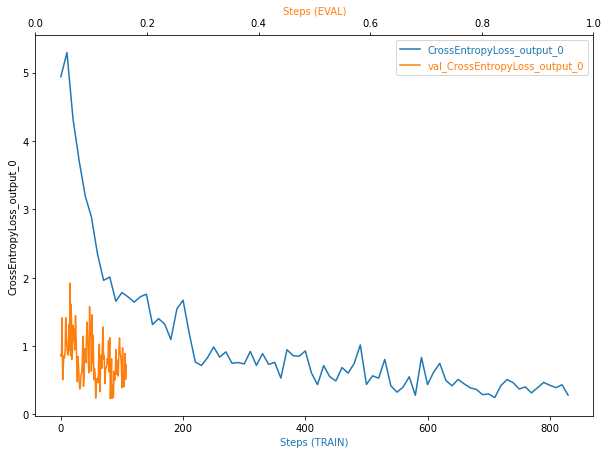

In [84]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

### Profiler Report

In [30]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
rule_output_path

's3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-07-16-54-05-711/rule-output'

In [31]:
! aws s3 ls {rule_output_path} --recursive

2022-01-07 17:18:33     375780 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-01-07 17:18:32     223706 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-01-07 17:18:27        192 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-01-07 17:18:27        200 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-01-07 17:18:27       2247 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-01-07 17:18:27        127 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-01-07 17:18:27        199 pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-re

In [32]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-286934319250/pytorch-training-2022-01-07-16-54-05-711/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-286934319250/pytorc

In [33]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [34]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [118]:
from sagemaker.pytorch import PyTorchModel

pytorch_model = PyTorchModel(model_data=estimator.model_data, 
                             role=role, 
                             entry_point='inference.py', 
                             py_version='py36',
                             framework_version='1.8')


predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge')

------!

In [128]:
from sagemaker.serializers import IdentitySerializer
predictor.serializer = IdentitySerializer("image/jpeg")

In [105]:
from PIL import Image
from IPython.display import Image as ImageDisplay
import io

def identify_dog(image_path):    
    buf = io.BytesIO()
    Image.open(image_path).save(buf, format="JPEG")
    response = predictor.predict(buf.getvalue())
    
    folders = list(listdir("./dogImages/train"))
    folders.sort()
    return folders[list(response[0]).index(max(response[0]))]
    

In [110]:
nora_image = "./custom_dog_images/Nora.jpeg"

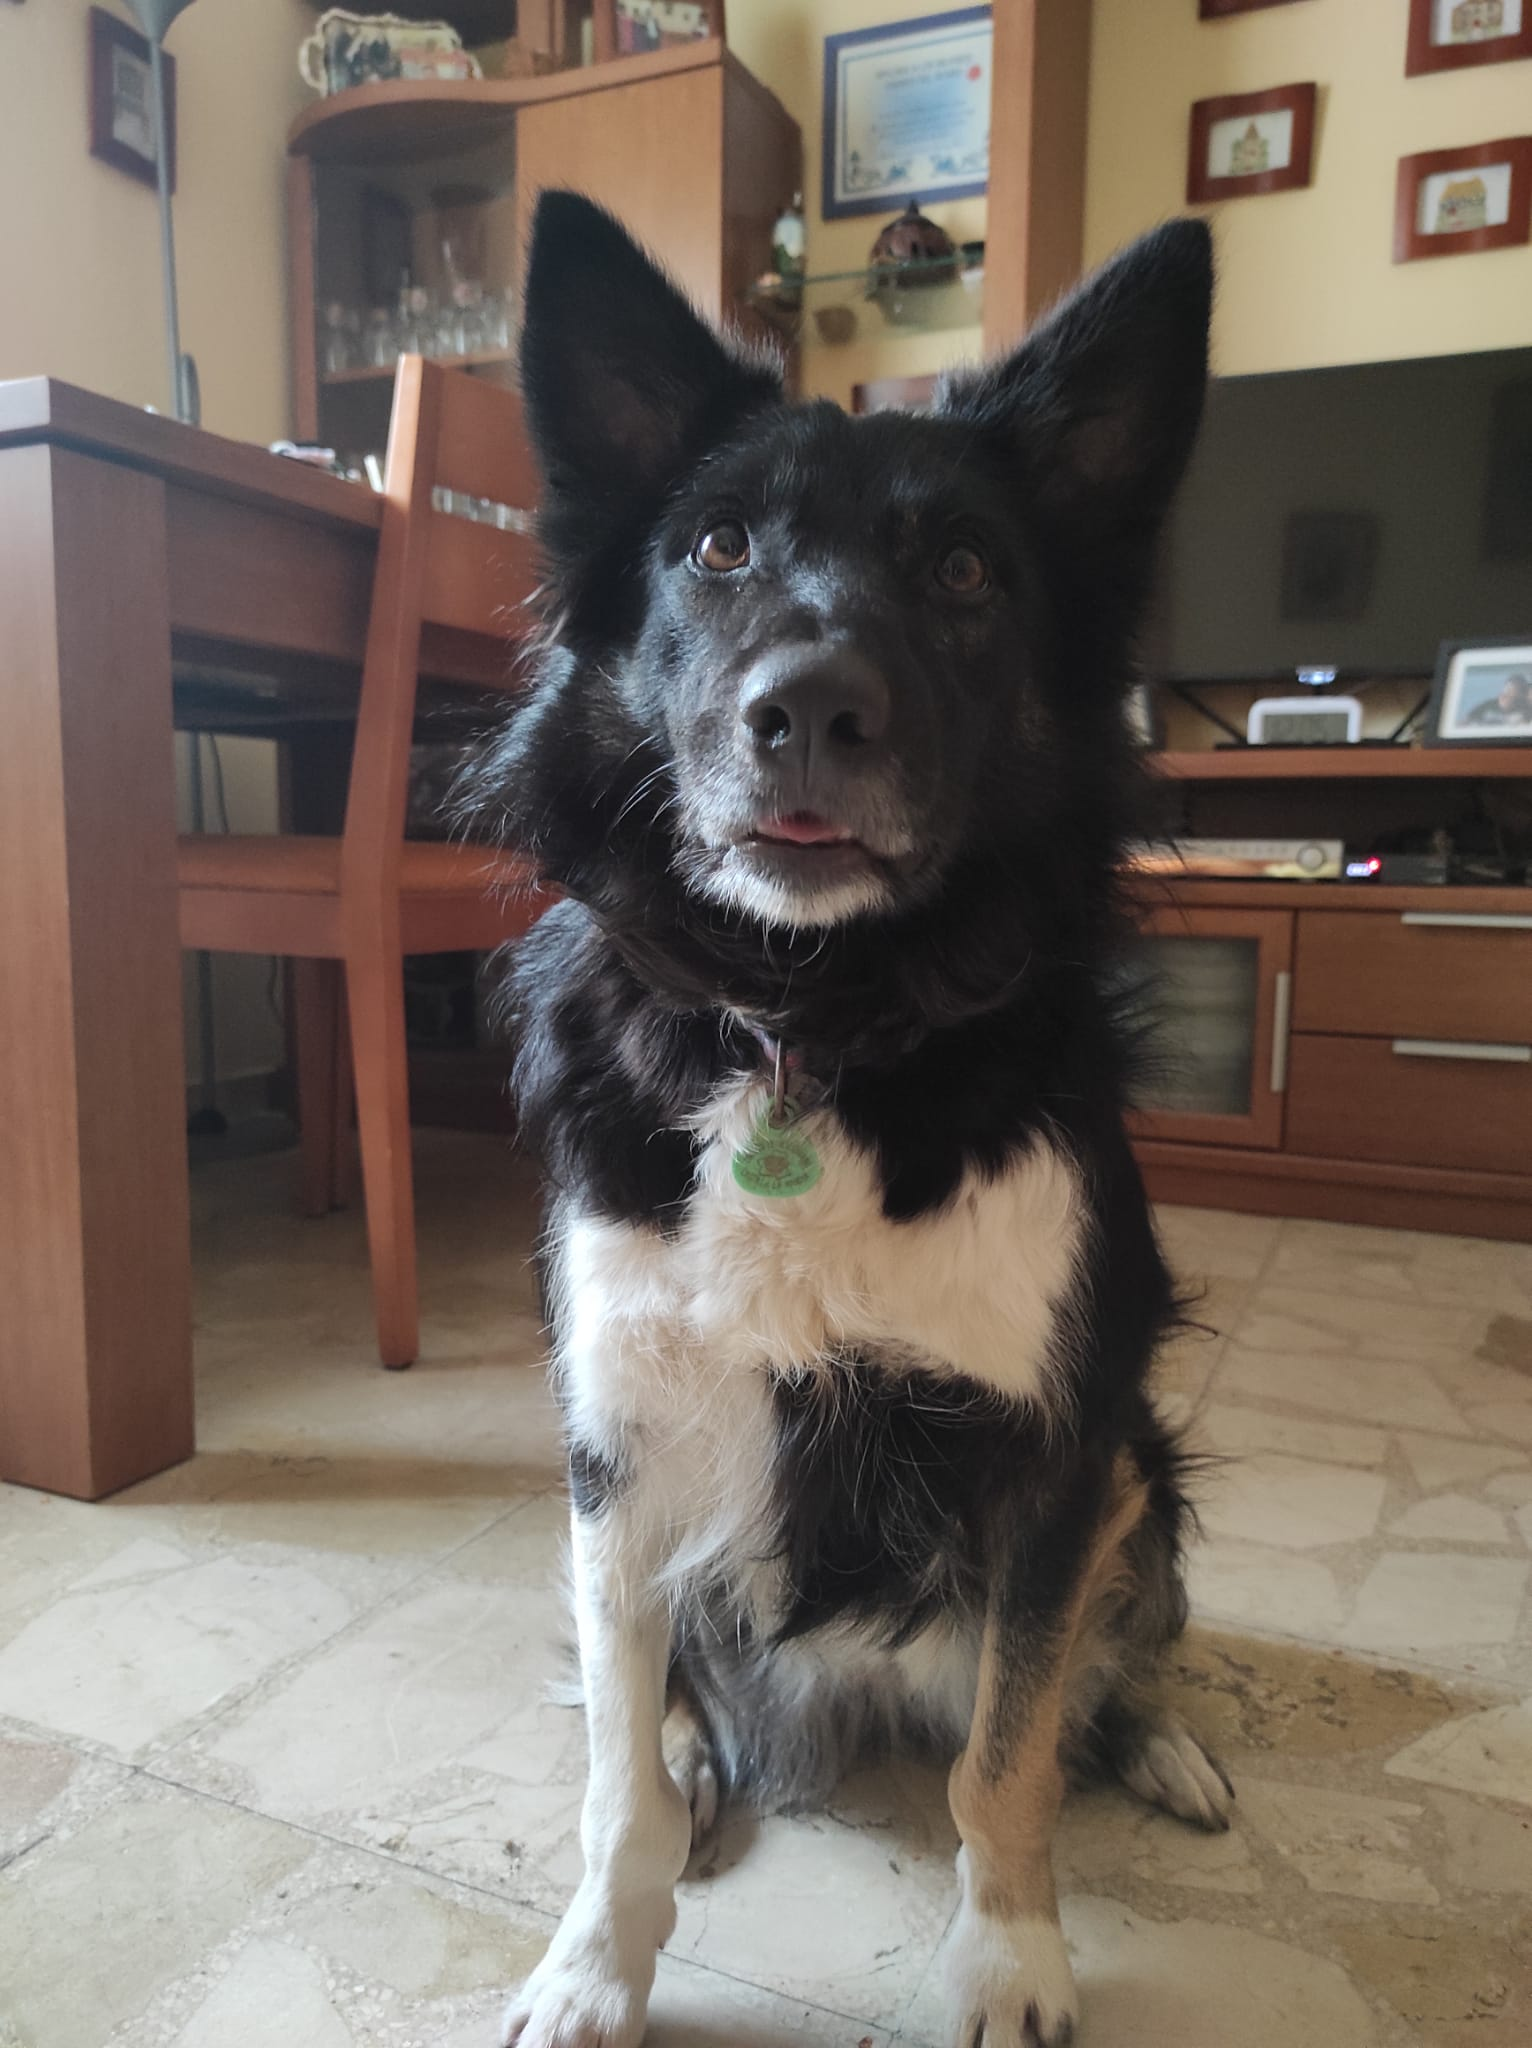

In [112]:
ImageDisplay(nora_image)

In [129]:
identify_dog(nora_image)

'029.Border_collie'

In [114]:
robe_image = "./custom_dog_images/Robe.jpeg"

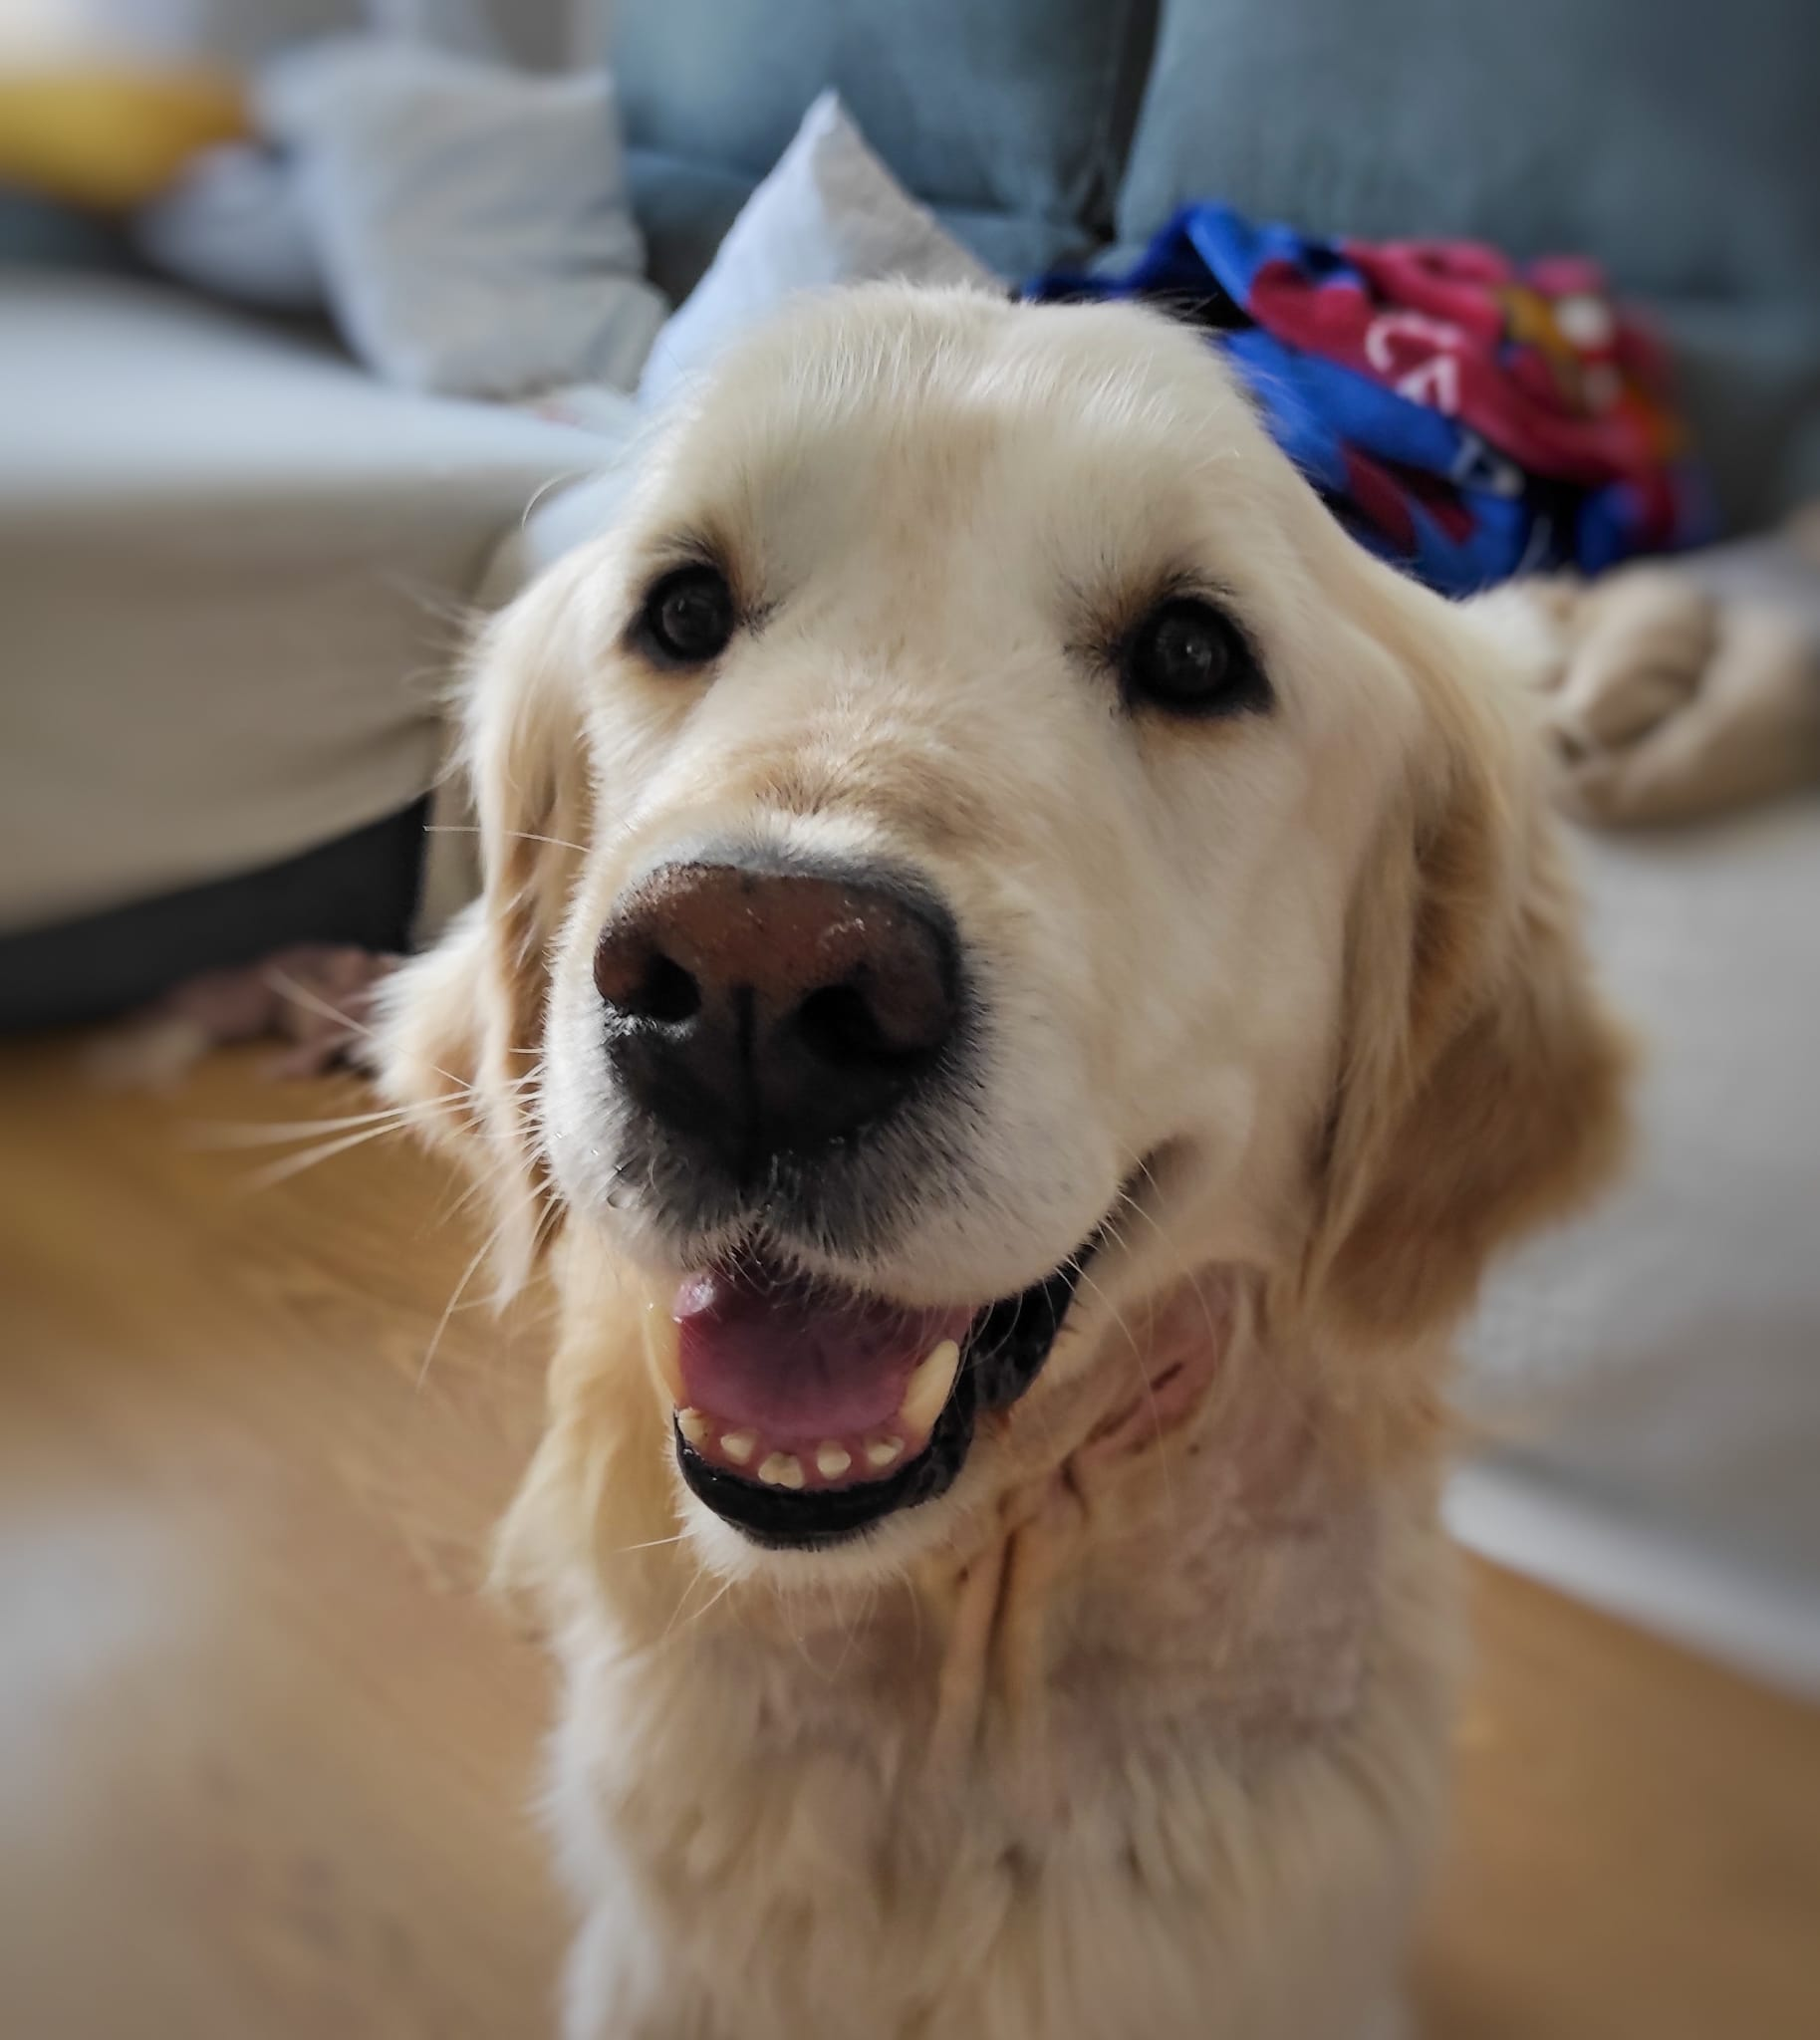

In [115]:
ImageDisplay(robe_image)

In [116]:
identify_dog(robe_image)

'076.Golden_retriever'

In [134]:
predictor.delete_endpoint()